# **FORMULA 1 Analysis (2023-2024)**

## Created by Ashutosh Shukla

![F1_2023_logo.png](attachment:F1_2023_logo.png)


#**The 2023 Formula 1 Season**

# Welcome to the Data Analysis of Formula 1 2023 Season!

New season, new cars; drivers are hungry for passion and glory, teams are eager to showcase their speed machines on the tracks, and we, the fans, are excited to witness the thrilling scenes wherever possible... Welcome to the **74th season** of Formula 1 history!

This season marked the continuation of **the new era of F1 cars**, designed to enhance closer racing by narrowing the gap between the fastest and slowest cars on the grid. Innovations aimed at reducing 'dirty air' have been further refined, allowing for less downforce loss for cars racing closely behind. The addition of over-wheel winglets and wheel covers has been optimized, alongside the implementation of larger tyres (from 13-inch to 18-inch). The return of ground effects, initially introduced in the late 1970s, is now more advanced, and rear wings feature 'rolled tips' for improved aerodynamics. The season also emphasizes sustainability with the use of more eco-friendly fuels. However, the familiar **1.6-litre turbo-hybrid engine** remains, along with the crucial **halo design** for driver safety, providing enhanced energy absorption during impacts.

Yet, these advancements have also led to challenges, notably the phenomenon known as **porpoising**. This issue manifests as cars bounce up and down on straights, creating discomfort for drivers and complicating teams’ strategies. Teams that successfully address porpoising will gain a significant aerodynamic advantage in the championship race.

The 2023 season promises to be **an electrifying one**, filled with intense head-to-head battles witnessed by fans during races, numerous attempts to secure pole positions, and a plethora of shocking, mind-blowing events both on and off the track! Ultimately, one driver and one team will emerge victorious, proudly declaring their supremacy over their rivals. This is why these data analyses are essential for gaining insights into all aspects of the season.

As we delve into the details of each race, we will analyze performance, strategies, and the impact of new regulations. With each lap, the excitement builds, and the competition intensifies. Let the season unfold!

**Key Themes for 2023:**
- **Closer Racing:** Enhanced designs to promote closer competition on track.
- **Sustainability:** Focus on eco-friendly fuels and innovations for a greener future.
- **Driver Safety:** Continued commitment to improving safety standards.
- **Aerodynamic Challenges:** Addressing porpoising to gain an advantage.



### Get ready for a season filled with drama, strategy, and exhilarating moments. The grid is set, and the roar of engines is about to ignite the passion of fans worldwide!


As always, we start by importing the necessary libraries and reading all the corresponding carefully-crafted datasets below. In addition, there is a helper function that assigns the colors to drivers and teams appropriately, especially useful for data visualizations.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import math
from datetime import timedelta
import matplotlib.font_manager as font_manager
font_manager.fontManager.addfont(r"Formula1-Regular.otf")
import random

In [ ]:
season2013RaceResults = r"PreviousSeasons\Formula1_2013season_raceResults.csv"
season2014RaceResults = r"PreviousSeasons\Formula1_2014season_raceResults.csv"
season2015RaceResults = r"PreviousSeasons\Formula1_2015season_raceResults.csv"
season2016RaceResults = r"PreviousSeasons\Formula1_2016season_raceResults.csv"
season2017RaceResults = r"PreviousSeasons\Formula1_2017season_raceResults.csv"
season2018RaceResults = r"PreviousSeasons\Formula1_2018season_raceResults.csv"

In [ ]:
# calendar = pd.read_csv('formula1_2021season_calendar.csv')
# calendar.set_index('Round', inplace=True)
# drivers = pd.read_csv('formula1_2021season_drivers.csv')
# drivers.set_index('Abbreviation', inplace=True)
# teams = pd.read_csv('formula1_2021season_teams.csv')
# teams.index = range(1,11)
# sprintQualiResults = pd.read_csv('formula1_2021season_sprintQualifyingResults.csv')
# raceResults = pd.read_csv('formula1_2021season_raceResults.csv')

In [ ]:
# season2022RaceCalendar = pd.read_csv('Formula1_2022season_calendar.csv')
# season2022RaceCalendar.set_index('Round', inplace=True)
# season2022Drivers = pd.read_csv('Formula1_2022season_drivers.csv')
# season2022Drivers.set_index('Abbreviation', inplace=True)
# season2022Teams = pd.read_csv('Formula1_2022season_teams.csv')
# season2022Teams.index = range(1,11)
# season2022QualifyingResults = pd.read_csv('Formula1_2022season_qualifyingResults.csv')
# season2022SprintRaceResults = pd.read_csv('Formula1_2022season_sprintRaceResults.csv')
season2022RaceResults = pd.read_csv('Formula1_2022season_raceResults.csv')
# season2022DotdVotes = pd.read_csv('formula1_2022season_driverOfTheDayVotes.csv')
# season2022DotdVotes.set_index('Track', inplace=True)

In [ ]:
season2023RaceCalendar = pd.read_csv('Formula1_2023season_calendar.csv')
season2023RaceCalendar.set_index('Round', inplace=True)
season2023Drivers = pd.read_csv('Formula1_2023season_drivers.csv')
season2023Drivers.set_index('Abbreviation', inplace=True)
season2023Teams = pd.read_csv('Formula1_2023season_teams.csv')
season2023Teams.index = range(1,11)
season2023QualifyingResults = pd.read_csv('Formula1_2023season_qualifyingResults.csv')
season2023SprintRaceResults = pd.read_csv('Formula1_2023season_sprintResults.csv')
season2023RaceResults = pd.read_csv('Formula1_2023season_raceResults.csv')
season2023DotdVotes = pd.read_csv('Formula1_2023season_driverOfTheDayVotes.csv')
season2023DotdVotes.set_index('Track', inplace=True)
RaceTracks = season2023RaceCalendar.loc[:, 'Race Date':'Circuit Name']

In [ ]:
season2024RaceResults = pd.read_csv('Formula1_2024season_raceResults.csv')
season2024QualifyingResults = pd.read_csv('Formula1_2024season_qualifyingResults.csv')
season2024SprintRaceResults = pd.read_csv('Formula1_2024season_sprintResults.csv')

In [ ]:
def assign_color(val_type, values):
    cl = []
    for val in values:
        if val_type == 'drivers':  abbr = val.split()[1].upper()[0:3]
        elif val_type == 'teams':  abbr = val[0:4].upper()
        if abbr in ['ALFA','BOT','ZHO']:           cl.append('#900000')
        elif abbr in ['HAAS','HUL','MAG']:         cl.append('#ffffff')
        elif abbr in ['ASTO','VET','STR']:         cl.append('#006f62')
        elif abbr in ['WILL','ALB','LAT','DE']:    cl.append('#0072ff')
        elif abbr in ['ALPH','RIC','TSU']:         cl.append('#2b5962')
        elif abbr in ['MCLA','RIC','NOR']:         cl.append('#ff8700')
        elif abbr in ['RED ','VER','PER']:         cl.append('#0600f0')
        elif abbr in ['FERR','LEC','SAI']:         cl.append('#cb0000')
        elif abbr in ['MERC','HAM','RUS']:         cl.append('#00d2bd')
        elif abbr in ['ALPI','ALO','OCO']:         cl.append('#0090ff')
    return cl

## 2023 Season - Race Calendar

2023 Season race calendar was comprised of **22 races**, across **4 continents** and **20 countries**...

In [ ]:
season2023RaceCalendar

,Race Date,GP Name,Country,City,Circuit Name,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones
Round,,,,,,,,,,,,,,
1,05/03/2023,Gulf Air Bahrain GP,Bahrain,Sakhir,Bahrain International Circuit,2004,57,5.412,308.238,1:31.447,Pedro de la Rosa,2005,15,3
2,19/03/2023,STC Saudi Arabian GP,Saudi Arabia,Jeddah,Jeddah Corniche Circuit,2021,50,6.174,308.450,1:30.734,Lewis Hamilton,2021,27,3
3,02/04/2023,Rolex Australian GP,Australia,Melbourne,Melbourne Grand Prix Circuit,1996,58,5.278,306.124,1:20.235,Sergio Perez,2023,14,4
4,30/04/2023,Azerbaijan GP,Azerbaijan,Baku,Baku City Circuit,2016,51,6.003,306.049,1:43.009,Charles Leclerc,2019,20,2
5,07/05/2023,Crypto.com Miami GP,United States,Miami,Miami International Autodrome,2022,57,5.412,308.326,1:29.708,Max Verstappen,2023,19,3
6,NaN,Qatar Airways Gran Premio Del Made In Italy e ...,Italy,Imola,Autodromo Enzo e Dino Ferrari,1980,63,4.909,309.049,1:15.484,Lewis Hamilton,2020,19,1
7,28/05/2023,Grand Prix de Monaco,Monaco,Monaco,Circuit de Monaco,1950,78,3.337,260.286,1:12.909,Lewis Hamilton,2021,19,1
8,04/06/2023,AWS Gran Premio de España,Spain,Catalunya,Circuit de Barcelona-Catalunya,1991,66,4.657,307.236,1:16.330,Max Verstappen,2023,14,2
9,18/06/2023,Pirelli Grand Prix du Canada,Canada,Montréal,Circuit Gilles-Villeneuve,1978,70,4.361,305.270,1:13.078,Valtteri Bottas,2018,14,3


#**The Drivers**

In [ ]:
season2023Drivers

,Driver,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
Abbreviation,,,,,,,,,,,,
VER,Max Verstappen,1,Red Bull Racing,Netherlands,98,2586.5,185,3,1(x54),1,30/09/1997,"Hasselt, Belgium"
PER,Sergio Perez,11,Red Bull Racing,Mexico,35,1486.0,258,0,1(x6),1,26/01/1990,"Guadalajara, Mexico"
HAM,Lewis Hamilton,44,Mercedes,United Kingdom,197,4639.5,332,7,1(x103),1,07/01/1985,"Stevenage, England"
ALO,Fernando Alonso,14,Aston Martin,Spain,106,2267.0,380,2,1(x32),1,29/07/1981,"Oviedo, Spain"
LEC,Charles Leclerc,16,Ferrari,Monaco,30,1074.0,125,0,1(x5),1,16/10/1997,"Monte Carlo, Monaco"
NOR,Lando Norris,4,McLaren,United Kingdom,13,633.0,104,0,2(x7),1,13/11/1999,"Bristol, England"
SAI,Carlos Sainz,55,Ferrari,Sapin,18,982.5,185,0,1(x2),1,01/09/1994,"Madrid, Spain"
RUS,George Russell,63,Mercedes,United Kingdom,11,469.0,104,0,1(x1),1,15/02/1998,"King's Lynn, England"
PIA,Oscar Piastri,81,McLaren,Australia,2,97.0,22,0,2(x1),2,06/04/2001,"Melbourne, Victoria"


#**Race Tracks**

In [ ]:
RaceTracks

,Race Date,GP Name,Country,City,Circuit Name
Round,,,,,
1,05/03/2023,Gulf Air Bahrain GP,Bahrain,Sakhir,Bahrain International Circuit
2,19/03/2023,STC Saudi Arabian GP,Saudi Arabia,Jeddah,Jeddah Corniche Circuit
3,02/04/2023,Rolex Australian GP,Australia,Melbourne,Melbourne Grand Prix Circuit
4,30/04/2023,Azerbaijan GP,Azerbaijan,Baku,Baku City Circuit
5,07/05/2023,Crypto.com Miami GP,United States,Miami,Miami International Autodrome
6,NaN,Qatar Airways Gran Premio Del Made In Italy e ...,Italy,Imola,Autodromo Enzo e Dino Ferrari
7,28/05/2023,Grand Prix de Monaco,Monaco,Monaco,Circuit de Monaco
8,04/06/2023,AWS Gran Premio de España,Spain,Catalunya,Circuit de Barcelona-Catalunya
9,18/06/2023,Pirelli Grand Prix du Canada,Canada,Montréal,Circuit Gilles-Villeneuve


# **Several Notable Races in 2023 Season**
Within the 23-race-long 2023 season, there were such race weekends that stood out more than others for intriguing, scary, or spectacular incidents. Let's see how all the races were

In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Bahrain'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,1:36.236
2,11,Sergio Perez,Red Bull Racing Honda RBPT,2,57,+11.987,18,No,1:36.344
3,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,57,+38.637,15,No,1:36.156
4,55,Carlos Sainz,Ferrari,4,57,+48.052,12,No,1:37.130
5,44,Lewis Hamilton,Mercedes,7,57,+50.977,10,No,1:36.546
6,18,Lance Stroll,Aston Martin Aramco Mercedes,8,57,+54.502,8,No,1:36.546
7,63,George Russell,Mercedes,6,57,+55.873,6,No,1:37.221
8,77,Valtteri Bottas,Alfa Romeo Ferrari,12,57,+72.647,4,No,1:37.379
9,10,Pierre Gasly,Alpine Renault,20,57,+73.753,2,No,1:35.068


# **Bahrain Grand Prix (March 5, 2023)**

**Location:** Bahrain International Circuit, Sakhir

**Circuit Length:** 5.412 km

**Laps:** 57

**Total Distance:** 308.238 km

**Weather:** Hot and dry, with mild winds.
## **Key Highlights**
**Pole Position:** Max Verstappen (Red Bull)

**Winner:** Max Verstappen (Red Bull)

**Fastest Lap:** Zhou Guanyu (Alfa Romeo) – set on the last lap.
## **Detailed Highlights**
It was a thrilling Grand Prix, with the **best place on the podium** going to **Max Verstappen**. The **Red Bull Racing Honda RBPT** driver started from **pole position** and was class leader throughout, crossing the finish line with **1:33:56.736**.

### Qualifying Session

Verstappen's teammate **Sergio Perez** qualified **second** for the starting grid, and **Fernando Alonso** from **Aston Martin Aramco Mercedes** qualified **fifth**. **Lewis Hamilton** of **Mercedes** begins from **seventh**, and **Carlos Sainz** of **Ferrari** starts **fourth**.

### Race Results

Verstappen led the race from start to finish, thus crossing the chequered flag with considerable comfort over the rest of the field. **Perez finished as the runner-up**, almost a second and a half behind his teammate, **Alonso thereby claiming the third spot**, 38.637 seconds behind the winner.

The rest of the field had **Sainz cross the checkered flag in fourth** while **Hamilton came home in fifth**. **Lance Stroll** of **Aston Martin Aramco Mercedes** was **sixth**, while **George Russell** of **Mercedes** came home in **seventh**. **Valtteri Bottas** of **Alfa Romeo Ferrari** drove to **eighth**. **Pierre Gasly** of **Alpine Renault** put the **ninth** card on the table, and **Alexander Albon** of **Williams Mercedes** brought up the rear in **tenth**.

### Fastest Laps

In terms of pure speed, **Max Verstappen recorded the fastest lap time** at **1:36.236**. **Sergio Perez** was not much behind at his fastest lap, at **1:36.344**. In fact, the subsequent drivers - **Lewis Hamilton and Lance Stroll** were also identical in their fastest lap times, this time at **1:36.546**.

### RedBull Performance

It was a grand race in all, courtesy of **Red Bull Racing Honda RBPT**, and **Perez and Verstappen claimed the first two spots on the podium**.

**Race Highlights:** https://www.youtube.com/watch?v=f9j8nhMNYO4

In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Saudi Arabia'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,11,Sergio Perez,Red Bull Racing Honda RBPT,1,50,1:21:14.894,25,No,1:32.188
2,1,Max Verstappen,Red Bull Racing Honda RBPT,15,50,+5.335,19,Yes,1:31.906
3,14,Fernando Alonso,Aston Martin Aramco Mercedes,2,50,+20.728,15,No,1:32.240
4,63,George Russell,Mercedes,3,50,+25.866,12,No,1:32.433
5,44,Lewis Hamilton,Mercedes,7,50,+31.065,10,No,1:32.941
6,55,Carlos Sainz,Ferrari,4,50,+35.876,8,No,1:32.822
7,16,Charles Leclerc,Ferrari,12,50,+43.162,6,No,1:33.056
8,31,Esteban Ocon,Alpine Renault,6,50,+52.832,4,No,1:33.222
9,10,Pierre Gasly,Alpine Renault,9,50,+54.747,2,No,1:33.392


**Saudi Arabian Grand Prix (March 19, 2023)**
=============================================

### Location and Circuit Details

* **Location:** Jeddah Corniche Circuit, Saudi Arabia
* **Circuit Length:** 6.174 km
* **Laps:** 50
* **Total Distance:** 308.450 km
* **Weather:** Hot and humid, with night-time conditions.

### Key Highlights

* **Pole Position:** Sergio Pérez (Red Bull)
* **Winner:** Sergio Pérez (Red Bull)
* **Fastest Lap:** Max Verstappen (Red Bull)

### Detailed Highlights

#### Pérez's Night

After qualifying on pole, Pérez controlled the race to claim victory. His race pace and tire management were exceptional.

#### Verstappen's Recovery

Max Verstappen started 15th due to a driveshaft issue in qualifying. His recovery drive to 2nd, aided by Red Bull's DRS advantage, was remarkable.

#### Alonso's Penalty Drama

Fernando Alonso initially crossed the line 3rd, but was handed a 10-second penalty for an incorrect grid positioning during the start. However, he later regained 3rd after Aston Martin appealed.

#### Mercedes Struggles

Lewis Hamilton finished 5th, but the team was clearly struggling with balance and tire degradation issues.

### Red Bull Performance

* **Drivers:** Sergio Pérez, Max Verstappen
* **Points:** 44 (25 + 19)
* **Fastest Laps:** 1 (Max Verstappen - 1:31.906)
* **Average Finish Position:** 1.5 ((1 + 2) / 2)

**Race Highlights:** https://www.youtube.com/watch?v=BxGpi0racMc

In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Australia'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,58,2:32:28.371,25,No,1:20.342
2,44,Lewis Hamilton,Mercedes,3,58,+0.179,18,No,1:20.613
3,14,Fernando Alonso,Aston Martin Aramco Mercedes,4,58,+0.769,15,No,1:20.476
4,18,Lance Stroll,Aston Martin Aramco Mercedes,6,58,+3.082,12,No,1:20.934
5,11,Sergio Perez,Red Bull Racing Honda RBPT,20,58,+3.320,11,Yes,1:20.235
6,4,Lando Norris,McLaren Mercedes,13,58,+3.701,8,No,1:21.173
7,27,Nico Hulkenberg,Haas Ferrari,10,58,+4.939,6,No,1:21.124
8,81,Oscar Piastri,McLaren Mercedes,16,58,+5.382,4,No,1:21.335
9,24,Guanyu Zhou,Alfa Romeo Ferrari,17,58,+5.713,2,No,1:21.819


# **Australian Grand Prix (April 2, 2023)**

**Location:** Albert Park Circuit, Melbourne, Australia

**Circuit Length:** 5.278 km

**Laps:** 58

**Total Distance:** 306.124 km

**Weather:** Cloudy with some early rain.

## **Key Highlights**
**Pole Position:** Max Verstappen (Red Bull)

**Winner:** Max Verstappen (Red Bull)

**Fastest Lap:** Sergio Pérez (Red Bull)

## **Detailed Highlights**
#### Verstappen's Dominance

Max Verstappen controlled the race from start to finish, claiming his second win of the season. His pace and tire management were exceptional.

#### Hamilton's Close Call

Lewis Hamilton finished a close second, just 0.179 seconds behind Verstappen. He pushed hard but couldn't quite catch the Red Bull driver.

#### Alonso's Strong Start

Fernando Alonso had a strong start to the season, finishing third and scoring 15 points for Aston Martin.

#### Pérez's Fastest Lap

Sergio Pérez set the fastest lap of the race, a 1:20.235, on his way to a fifth-place finish.

### Red Bull Performance

* **Points:** 36 (25 + 11)
* **Fastest Laps:** 1 (Sergio Pérez - 1:20.235)
* **Average Finish Position:** 3 ((1 + 5) / 2)

**Race Highlights:** https://www.youtube.com/watch?v=FExS3lFEwqc

In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Azerbaijan'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,11,Sergio Perez,Red Bull Racing Honda RBPT,3,51,1:32:42.436,25,No,1:44.589
2,1,Max Verstappen,Red Bull Racing Honda RBPT,2,51,+2.137,18,No,1:44.232
3,16,Charles Leclerc,Ferrari,1,51,+21.217,15,No,1:44.561
4,14,Fernando Alonso,Aston Martin Aramco Mercedes,6,51,+22.024,12,No,1:44.241
5,55,Carlos Sainz,Ferrari,4,51,+45.491,10,No,1:45.175
6,44,Lewis Hamilton,Mercedes,5,51,+46.145,8,No,1:45.346
7,18,Lance Stroll,Aston Martin Aramco Mercedes,9,51,+51.617,6,No,1:45.627
8,63,George Russell,Mercedes,11,51,+74.240,5,Yes,1:43.370
9,4,Lando Norris,McLaren Mercedes,7,51,+80.376,2,No,1:45.738


# **Azerbaijan Grand Prix (April 30, 2023)**

**Location:** Baku City Circuit, Azerbaijan

**Circuit Length:** 6.003 km

**Laps:** 51

**Total Distance:** 306.049 km

**Weather:** Clear skies, moderate temperatures.

## **Key Highlights**
**Pole Position:** Charles Leclerc (Ferrari)

**Winner:** Sergio Pérez (Red Bull)

**Fastest Lap:** George Russell (Mercedes)

## **Detailed Highlights**
**Sprint Weekend:** This was the first Sprint weekend of the season. Sergio Pérez won both the Sprint race and the main race.

**Leclerc’s Pole:** Charles Leclerc put Ferrari on pole but couldn’t hold off the Red Bulls during the race, eventually finishing 3rd.

**Red Bull's DRS Advantage:** The long straights at Baku played to Red Bull’s strengths, with both Verstappen and Pérez overtaking Leclerc easily.

**Pit Strategy:** A well-timed pit stop during the Safety Car period allowed Pérez to leapfrog Verstappen for the race lead.

**Hamilton’s Struggles:** Mercedes showed decent pace, but Lewis Hamilton could only manage 6th, while George Russell finished 8th.



**Race Highlights:** https://www.youtube.com/watch?v=nJIrvbkr4pk

In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Miami'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,9,57,1:27:38.241,26,Yes,1:29.708
2,11,Sergio Perez,Red Bull Racing Honda RBPT,1,57,+5.384,18,No,1:30.560
3,14,Fernando Alonso,Aston Martin Aramco Mercedes,2,57,+26.305,15,No,1:30.519
4,63,George Russell,Mercedes,6,57,+33.229,12,No,1:31.015
5,55,Carlos Sainz,Ferrari,3,57,+42.511,10,No,1:31.362
6,44,Lewis Hamilton,Mercedes,13,57,+51.249,8,No,1:30.669
7,16,Charles Leclerc,Ferrari,7,57,+52.988,6,No,1:31.434
8,10,Pierre Gasly,Alpine Renault,5,57,+55.670,4,No,1:31.971
9,31,Esteban Ocon,Alpine Renault,8,57,+58.123,2,No,1:31.143


# **Miami Grand Prix (May 7, 2023)**

**Location:** Miami International Autodrome, USA

**Circuit Length:** 5.412 km

**Laps:** 57

**Total Distance:** 308.326 km

**Weather:** Hot and humid conditions with changing track temperatures.

## **Key Highlights**
**Pole Position:** Sergio Pérez (Red Bull)

**Winner:** Max Verstappen (Red Bull)

**Fastest Lap:** Max Verstappen (Red Bull)

## **Detailed Highlights**
#### Verstappen's Comeback

Max Verstappen started from 9th position but managed to climb up to 1st, claiming his second win of the season. His pace and tire management were exceptional.

#### Pérez's Strong Qualifying

Sergio Pérez secured pole position but couldn't convert it into a win, finishing second. He still managed to score 18 points for Red Bull.

#### Alonso's Consistency

Fernando Alonso had another strong finish, scoring 15 points for Aston Martin. He continues to impress with his consistent performances.

#### Verstappen's Fastest Lap

Max Verstappen set the fastest lap of the race, a 1:29.708, on his way to victory.

### Red Bull Performance

* **Drivers:** Max Verstappen, Sergio Pérez
* **Points:** 44 (26 + 18)
* **Fastest Laps:** 1 (Max Verstappen - 1:29.708)
* **Average Finish Position:** 1.5 ((1 + 2) / 2)


**Race Highlights:** https://www.youtube.com/watch?v=2-jvlhc7c58

In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Monaco'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,78,1:48:51.980,25,No,1:16.604
2,14,Fernando Alonso,Aston Martin Aramco Mercedes,2,78,+27.921,18,No,1:16.674
3,31,Esteban Ocon,Alpine Renault,3,78,+36.990,15,No,1:16.528
4,44,Lewis Hamilton,Mercedes,5,78,+39.062,13,Yes,1:15.650
5,63,George Russell,Mercedes,8,78,+56.284,10,No,1:16.798
6,16,Charles Leclerc,Ferrari,6,78,+61.890,8,No,1:15.773
7,10,Pierre Gasly,Alpine Renault,7,78,+62.362,6,No,1:15.831
8,55,Carlos Sainz,Ferrari,4,78,+63.391,4,No,1:16.449
9,4,Lando Norris,McLaren Mercedes,10,77,+1 lap,2,No,1:17.844


# **Monaco Grand Prix (May 28, 2023)**

**Location:** Circuit de Monaco, Monte Carlo

**Circuit Length:** 3.337 km

**Laps:** 78

**Total Distance:** 260.286 km

**Weather:** Overcast, with rain towards the end.

## **Key Highlights**

 **Pole Position:** Max Verstappen (Red Bull)

 **Winner:** Max Verstappen (Red Bull)

 **Fastest Lap:** Lewis Hamilton (Mercedes)

# **Detailed Highlights**

#### Verstappen's Dominance

Max Verstappen dominated the race, starting from pole position and leading the entire race to claim his third win of the season. His pace and tire management were exceptional.

#### Alonso's Consistency

Fernando Alonso had another strong finish, scoring 18 points for Aston Martin. He continues to impress with his consistent performances.

#### Hamilton's Fastest Lap

Lewis Hamilton set the fastest lap of the race, a 1:15.650, on his way to fourth place.

### Red Bull Performance

* **Drivers:** Max Verstappen
* **Points:** 25
* **Fastest Laps:** 0
* **Average Finish Position:** 1

### Mercedes Performance

* **Drivers:** Lewis Hamilton, George Russell
* **Points:** 26 (13 + 10)
* **Fastest Laps:** 1 (Lewis Hamilton - 1:15.650)
* **Average Finish Position:** 4.5 ((4 + 5) / 2)

**Leclerc’s Struggles Continue:** Hometown hero Charles Leclerc finished 6th after another disappointing race for Ferrari due to strategic missteps.



**Race Highlights:** https://www.youtube.com/watch?v=JyBq7XYDiBg

In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Spain'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,66,1:27:57.940,26,Yes,1:16.330
2,44,Lewis Hamilton,Mercedes,4,66,+24.090,18,No,1:16.676
3,63,George Russell,Mercedes,12,66,+32.389,15,No,1:17.875
4,11,Sergio Perez,Red Bull Racing Honda RBPT,11,66,+35.812,12,No,1:16.666
5,55,Carlos Sainz,Ferrari,2,66,+45.698,10,No,1:18.403
6,18,Lance Stroll,Aston Martin Aramco Mercedes,5,66,+63.320,8,No,1:18.722
7,14,Fernando Alonso,Aston Martin Aramco Mercedes,8,66,+64.127,6,No,1:18.083
8,31,Esteban Ocon,Alpine Renault,6,66,+69.242,4,No,1:18.946
9,24,Guanyu Zhou,Alfa Romeo Ferrari,13,66,+71.878,2,No,1:18.753


# **Spanish Grand Prix (June 4, 2023)**

**Location:** Circuit de Barcelona-Catalunya, Spain

**Circuit Length:** 4.675 km

**Laps:** 66

**Total Distance:** 308.424 km

**Weather:** Warm and sunny, stable conditions.

### **Key Highlights**

* **Pole Position:** Max Verstappen (Red Bull)
* **Winner:** Max Verstappen (Red Bull)
* **Fastest Lap:** Max Verstappen (Red Bull) - 1:16.330

## **Detailed Highlights**

#### Verstappen's Dominance

Max Verstappen dominated the race, starting from pole position and leading the entire race to claim his fourth win of the season. His pace and tire management were exceptional.

#### Mercedes' Strong Performance

Mercedes had a strong race, with Lewis Hamilton and George Russell finishing second and third, respectively. They scored a total of 33 points.

#### Ferrari's Disappointment

Ferrari had a disappointing race, with Carlos Sainz finishing fifth and failing to score a podium.

### Red Bull Performance

* **Drivers:** Max Verstappen, Sergio Perez
* **Points:** 38 (26 + 12)
* **Fastest Laps:** 1 (Max Verstappen - 1:16.330)
* **Average Finish Position:** 2.5 ((1 + 4) / 2)

### Mercedes Performance

* **Drivers:** Lewis Hamilton, George Russell
* **Points:** 33 (18 + 15)
* **Fastest Laps:** 0
* **Average Finish Position:** 2.5 ((2 + 3) / 2)


**Race Highlights:** https://www.youtube.com/watch?v=Yd5FCI0JWMg


In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Canada'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,70,1:33:58.348,25,No,1:15.594
2,14,Fernando Alonso,Aston Martin Aramco Mercedes,2,70,+9.570,18,No,1:15.779
3,44,Lewis Hamilton,Mercedes,3,70,+14.168,15,No,1:15.396
4,16,Charles Leclerc,Ferrari,10,70,+18.648,12,No,1:15.907
5,55,Carlos Sainz,Ferrari,11,70,+21.540,10,No,1:15.911
6,11,Sergio Perez,Red Bull Racing Honda RBPT,12,70,+51.028,9,Yes,1:14.481
7,23,Alexander Albon,Williams Mercedes,9,70,+60.813,6,No,1:16.917
8,31,Esteban Ocon,Alpine Renault,6,70,+61.692,4,No,1:16.782
9,18,Lance Stroll,Aston Martin Aramco Mercedes,16,70,+64.402,2,No,1:16.564


# **Canadian Grand Prix (June 18, 2023)**

**Location:** Circuit Gilles Villeneuve, Montreal, Canada

**Circuit Length:** 4.361 km

**Laps:** 70

**Total Distance:** 305.270 km

**Weather:** Cold and rainy during qualifying, but dry for the race.

## **Key Highlights**

 **Pole Position:** Max Verstappen (Red Bull)

 **Winner:** Max Verstappen (Red Bull)

 **Fastest Lap:** Sergio Pérez (Red Bull) - 1:14.481

## **Detailed Highlights**

#### Verstappen's Dominance

Max Verstappen dominated the race, starting from pole position and leading the entire race to claim his third win of the season. His pace and tire management were exceptional.

#### Alonso's Consistency

Fernando Alonso had another strong finish, scoring 18 points for Aston Martin. He continues to impress with his consistent performances.

#### Hamilton's Podium

Lewis Hamilton finished third, scoring 15 points for Mercedes. He had a strong race, but couldn't quite catch up to the leaders.

### Red Bull Performance

* **Drivers:** Max Verstappen, Sergio Pérez
* **Points:** 34 (25 + 9)
* **Fastest Laps:** 1 (Sergio Pérez - 1:14.481)
* **Average Finish Position:** 2 ((1 + 6) / 2)


**Race Highlights:** https://www.youtube.com/watch?v=yX_GUhWiBHk


In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Austria'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,71,1:25:33.607,26,Yes,1:07.012
2,16,Charles Leclerc,Ferrari,2,71,+5.155,18,No,1:08.820
3,11,Sergio Perez,Red Bull Racing Honda RBPT,15,71,+17.188,15,No,1:08.111
4,4,Lando Norris,McLaren Mercedes,4,71,+26.327,12,No,1:08.739
5,14,Fernando Alonso,Aston Martin Aramco Mercedes,7,71,+30.317,10,No,1:09.108
6,55,Carlos Sainz,Ferrari,3,71,+31.377,8,No,1:08.880
7,63,George Russell,Mercedes,11,71,+48.403,6,No,1:09.283
8,44,Lewis Hamilton,Mercedes,5,71,+49.196,4,No,1:09.160
9,18,Lance Stroll,Aston Martin Aramco Mercedes,6,71,+59.043,2,No,1:08.463


# **Austrian Grand Prix (July 2, 2023)**

**Location:** Red Bull Ring, Spielberg, Austria

**Circuit Length:** 4.318 km

**Laps:** 71

**Total Distance:** 306.452 km

**Weather:** Sunny and warm.

## **Key Highlights**
**Pole Position:** Max Verstappen (Red Bull)

**Winner:** Max Verstappen (Red Bull)

**Fastest Lap:** Max Verstappen (Red Bull)

## **Detailed Highlights**
**Sprint Weekend:** Verstappen dominated both the Sprint race and the main Grand Prix.

**Pérez’s Recovery:** Pérez started outside the top 10 but delivered an impressive recovery to finish 3rd, marking his return to form after a few disappointing races.

**Track Limits Chaos:** The race saw a number of drivers receive penalties for exceeding track limits, including several high-profile names like Lewis Hamilton and Lando Norris.

**Ferrari Bounce Back:** Leclerc finished 2nd, his first podium since Azerbaijan. Ferrari appeared to have improved race pace compared to the last few races.


**Race Highlights:** https://www.youtube.com/watch?v=gzwm8hYryro



In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Great Britain'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,52,1:25:16.938,26,Yes,1:30.275
2,4,Lando Norris,McLaren Mercedes,2,52,+3.798,18,No,1:30.543
3,44,Lewis Hamilton,Mercedes,7,52,+6.783,15,No,1:30.545
4,81,Oscar Piastri,McLaren Mercedes,3,52,+7.776,12,No,1:30.850
5,63,George Russell,Mercedes,6,52,+11.206,10,No,1:31.124
6,11,Sergio Perez,Red Bull Racing Honda RBPT,15,52,+12.882,8,No,1:30.914
7,14,Fernando Alonso,Aston Martin Aramco Mercedes,9,52,+17.193,6,No,1:31.338
8,23,Alexander Albon,Williams Mercedes,8,52,+17.878,4,No,1:31.273
9,16,Charles Leclerc,Ferrari,4,52,+18.689,2,No,1:31.255


# **British Grand Prix (July 9, 2023)**

**Location:** Silverstone Circuit, UK

**Circuit Length:** 5.891 km

**Laps:** 52

**Total Distance:** 306.198 km

**Weather:** Overcast with mild temperatures.

## **Key Highlights**

 **Pole Position:** Max Verstappen (Red Bull)

 **Winner:** Max Verstappen (Red Bull)

 **Fastest Lap:** Max Verstappen (Red Bull) - 1:30.275

## **Detailed Highlights**

#### Verstappen's Dominance

Max Verstappen dominated the race, starting from pole position and leading the entire race to claim his fourth win of the season. His pace and tire management were exceptional.

#### McLaren's Strong Performance

McLaren had a strong race, with Lando Norris and Oscar Piastri finishing second and fourth, respectively. They scored a total of 30 points.

#### Hamilton's Podium

Lewis Hamilton finished third, scoring 15 points for Mercedes. He had a strong race, but couldn't quite catch up to the leaders.

### Red Bull Performance

* **Drivers:** Max Verstappen, Sergio Pérez
* **Points:** 34 (26 + 8)
* **Fastest Laps:** 1 (Max Verstappen - 1:30.275)
* **Average Finish Position:** 3.5 ((1 + 6) / 2)


**Race Highlights:** https://www.youtube.com/watch?v=NxQT7GIkPLI


In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Hungary'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,2,70,1:38:08.634,26,Yes,1:20.504
2,4,Lando Norris,McLaren Mercedes,3,70,+33.731,18,No,1:22.178
3,11,Sergio Perez,Red Bull Racing Honda RBPT,9,70,+37.603,15,No,1:22.295
4,44,Lewis Hamilton,Mercedes,1,70,+39.134,12,No,1:21.601
5,81,Oscar Piastri,McLaren Mercedes,4,70,+62.572,10,No,1:22.736
6,63,George Russell,Mercedes,18,70,+65.825,8,No,1:22.158
7,16,Charles Leclerc,Ferrari,6,70,+70.317,6,No,1:22.469
8,55,Carlos Sainz,Ferrari,11,70,+71.073,4,No,1:22.584
9,14,Fernando Alonso,Aston Martin Aramco Mercedes,8,70,+75.709,2,No,1:22.745


# **Hungarian Grand Prix (July 23, 2023)**

**Location:** Hungaroring, Budapest, Hungary

**Circuit Length:** 4.381 km

**Laps:** 70

**Total Distance:** 306.630 km

**Weather:** Hot and sunny.

## **Key Highlights**

 **Pole Position:** Lewis Hamilton (Mercedes)

 **Winner:** Max Verstappen (Red Bull)

**Fastest Lap:** Max Verstappen (Red Bull) - 1:20.504

## **Detailed Highlights**

#### Verstappen's Comeback

Max Verstappen started from second position but managed to climb up to 1st, claiming his fifth win of the season. His pace and tire management were exceptional.

#### Norris's Strong Performance

Lando Norris finished second, scoring 18 points for McLaren. He had a strong race, but couldn't quite catch up to Verstappen.

#### Pérez's Podium

Sergio Pérez finished third, scoring 15 points for Red Bull. He had a strong race, and his pace was impressive.

### Red Bull Performance

* **Drivers:** Max Verstappen, Sergio Pérez
* **Points:** 41 (26 + 15)
* **Fastest Laps:** 1 (Max Verstappen - 1:20.504)
* **Average Finish Position:** 2

**Race Highlights:** https://www.youtube.com/watch?v=ZANotpFRoMo


In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Belgium'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,6,44,1:22:30.450,25,No,1:48.922
2,11,Sergio Perez,Red Bull Racing Honda RBPT,2,44,+22.305,18,No,1:50.308
3,16,Charles Leclerc,Ferrari,1,44,+32.259,15,No,1:50.436
4,44,Lewis Hamilton,Mercedes,3,44,+49.671,13,Yes,1:47.305
5,14,Fernando Alonso,Aston Martin Aramco Mercedes,9,44,+56.184,10,No,1:50.938
6,63,George Russell,Mercedes,8,44,+63.101,8,No,1:50.603
7,4,Lando Norris,McLaren Mercedes,7,44,+73.719,6,No,1:51.682
8,31,Esteban Ocon,Alpine Renault,14,44,+74.719,4,No,1:50.439
9,18,Lance Stroll,Aston Martin Aramco Mercedes,10,44,+79.340,2,No,1:51.297


# **Belgian Grand Prix (July 30, 2023)**

**Location:** Circuit de Spa-Francorchamps, Belgium

**Circuit Length:** 7.004 km

**Laps:** 44

**Total Distance:** 308.052 km

**Weather:** Wet conditions during the Sprint, dry for the main race.

## **Key Highlights**
**Pole Position:** Max Verstappen (Red Bull)

**Winner:** Max Verstappen (Red Bull)

**Fastest Lap:** Lewis Hamilton (Mercedes)

## **Detailed Highlights**
**Verstappen’s Penalty:** Despite a 5-place grid penalty for a new gearbox, Verstappen won convincingly, showcasing Red Bull’s sheer pace.

**Sergio Pérez's Strong Race:** Pérez finished 2nd, marking his return to form after several difficult races.

**Hamilton vs Alonso:** Hamilton and Alonso fought hard throughout the race, with Hamilton ultimately finishing 4th and Alonso 5th.

**Ferrari’s Podium:** Leclerc secured 3rd, giving Ferrari a much-needed podium, though the team was still far off the Red Bull pace.

**Alpine’s Double Retirement:** Both Alpine cars retired early, continuing their run of bad luck.

**Race Highlights:** https://www.youtube.com/watch?v=C6h7NnkX7hk

In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Netherlands'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,72,2:24:04.411,25,No,1:13.889
2,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,72,+3.744,19,Yes,1:13.837
3,10,Pierre Gasly,Alpine Renault,12,72,+7.058,15,No,1:14.441
4,11,Sergio Perez,Red Bull Racing Honda RBPT,7,72,+10.068,12,No,1:14.231
5,55,Carlos Sainz,Ferrari,6,72,+12.541,10,No,1:14.934
6,44,Lewis Hamilton,Mercedes,13,72,+13.209,8,No,1:13.904
7,4,Lando Norris,McLaren Mercedes,2,72,+13.232,6,No,1:14.390
8,23,Alexander Albon,Williams Mercedes,4,72,+15.155,4,No,1:14.468
9,81,Oscar Piastri,McLaren Mercedes,8,72,+16.580,2,No,1:14.299


# **Dutch Grand Prix (August 27, 2023)**

**Location:** Circuit Zandvoort, Netherlands

**Circuit Length:** 4.259 km

**Laps:** 72

**Total Distance:** 306.648 km

**Weather:** Rainy at the start and end, but dry during the middle part of the race.

## **Key Highlights**
**Pole Position:** Max Verstappen (Red Bull)

**Winner:** Max Verstappen (Red Bull)

**Fastest Lap:** Fernando Alonso (Aston Martin)

## **Detailed Highlights**
**Wet Start:** The race started with rain, causing chaos on the first lap as drivers scrambled to switch to wet tires.

**Verstappen’s Mastery in the Wet:** Despite tricky conditions, Verstappen remained calm, leading most of the race and taking a comfortable win in front of his home crowd.

**Gasly's Podium**

Pierre Gasly finished third, scoring 15 points for Alpine. He had a strong race, and his pace was impressive.

**Alonso’s Podium:** Fernando Alonso finished second, scoring 19 points for Aston Martin. He had a strong race, and his fastest lap time was the quickest of the race.

**Pérez’s Struggles:** Pérez initially looked strong but was handed a 5-second penalty for speeding in the pit lane, ultimately finishing 4th.

**Mercedes’ Misfortunes:** Both Hamilton and Russell struggled to find pace, as they continued to deal with car balance issues.

### Red Bull Performance

* **Drivers:** Max Verstappen, Sergio Pérez
* **Points:** 37 (25 + 12)
* **Fastest Laps:** 0
* **Average Finish Position:** 2.5 ((1 + 4) / 2)


**Race Highlights:** https://www.youtube.com/watch?v=Ao7X7BS_vIs


In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Italy'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,2,51,1:13:41.143,25,No,1:25.240
2,11,Sergio Perez,Red Bull Racing Honda RBPT,5,51,+6.064,18,No,1:25.522
3,55,Carlos Sainz,Ferrari,1,51,+11.193,15,No,1:25.501
4,16,Charles Leclerc,Ferrari,3,51,+11.377,12,No,1:25.580
5,63,George Russell,Mercedes,4,51,+23.028,10,No,1:25.847
6,44,Lewis Hamilton,Mercedes,8,51,+42.679,8,No,1:25.582
7,23,Alexander Albon,Williams Mercedes,6,51,+45.106,6,No,1:26.389
8,4,Lando Norris,McLaren Mercedes,9,51,+45.449,4,No,1:26.144
9,14,Fernando Alonso,Aston Martin Aramco Mercedes,10,51,+46.294,2,No,1:26.105


# **Italian Grand Prix (September 3, 2023)**

**Location:** Autodromo Nazionale Monza, Italy

**Circuit Length:** 5.793 km

**Laps:** 53

**Total Distance:** 306.720 km

**Weather:** Warm and sunny.

## **Key Highlights**

**Pole Position:** Carlos Sainz (Ferrari)

**Winner:** Max Verstappen (Red Bull)

**Fastest Lap:** None (No driver set the fastest lap)

## **Detailed Highlights**

#### Verstappen's Win

Max Verstappen won the race, starting from second position and overtaking Carlos Sainz to claim his seventh win of the season. His pace and tire management were exceptional.

#### Pérez's Strong Performance

Sergio Pérez finished second, scoring 18 points for Red Bull. He had a strong race, and his pace was impressive.

#### Sainz's Pole Position

Carlos Sainz started from pole position, but ultimately finished third, scoring 15 points for Ferrari. He had a strong qualifying session, but struggled during the race.

### Red Bull Performance

* **Drivers:** Max Verstappen, Sergio Pérez
* **Points:** 43 (25 + 18)
* **Fastest Laps:** 0
* **Average Finish Position:** 1.5 ((1 + 2) / 2)

### Ferrari Performance

* **Drivers:** Carlos Sainz, Charles Leclerc
* **Points:** 27 (15 + 12)
* **Fastest Laps:** 0
* **Average Finish Position:** 3.5 ((3 + 4) / 2)



**Race Highlights:** https://www.youtube.com/watch?v=bd9eALWJRzY

In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Singapore'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,55,Carlos Sainz,Ferrari,1,62,1:46:37.418,25,No,1:37.666
2,4,Lando Norris,McLaren Mercedes,4,62,+0.812,18,No,1:38.046
3,44,Lewis Hamilton,Mercedes,5,62,+1.269,16,Yes,1:35.867
4,16,Charles Leclerc,Ferrari,3,62,+21.177,12,No,1:38.275
5,1,Max Verstappen,Red Bull Racing Honda RBPT,11,62,+21.441,10,No,1:36.575
6,10,Pierre Gasly,Alpine Renault,12,62,+38.441,8,No,1:38.277
7,81,Oscar Piastri,McLaren Mercedes,17,62,+41.479,6,No,1:38.492
8,11,Sergio Perez,Red Bull Racing Honda RBPT,13,62,+54.534,4,No,1:37.108
9,40,Liam Lawson,AlphaTauri Honda RBPT,10,62,+65.918,2,No,1:39.028


# **Singapore Grand Prix (September 17, 2023)**

**Location:** Marina Bay Street Circuit, Singapore

**Circuit Length:** 5.063 km

**Laps:** 62

**Total Distance:** 308.706 km

**Weather:** Humid and warm.

## **Key Highlights**

 **Pole Position:** Carlos Sainz (Ferrari)

 **Winner:** Carlos Sainz (Ferrari)

**Fastest Lap:** Lewis Hamilton (Mercedes) - 1:35.867

## **Detailed Highlights**

#### Sainz's Win

Carlos Sainz won the race, starting from pole position and leading the entire race to claim his first win of the season. His pace and tire management were exceptional.

#### Norris's Strong Performance

Lando Norris finished second, scoring 18 points for McLaren. He had a strong race, and his pace was impressive.

#### Hamilton's Fastest Lap

Lewis Hamilton finished third, scoring 16 points for Mercedes. He set the fastest lap time of the race, demonstrating his car's superior pace.

### Red Bull Performance

* **Drivers:** Max Verstappen, Sergio Pérez
* **Points:** 14 (10 + 4)
* **Fastest Laps:** 0
* **Average Finish Position:** 6.5 ((5 + 8) / 2)

#### Understeer Issues
Max Verstappen described the car as "not driveable anymore" in Q3, citing understeer issues as a major problem. He also mentioned that the car was "extremely tricky to drive from entry to mid-corner, massive balance shift at the moment." This lack of balance made it difficult for Verstappen to push the car to its limits.
#### Lack of Responsiveness
#### Strategy Issues


**Race Highlights:** https://www.youtube.com/watch?v=8TmrPvoHSGQ


In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Japan'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,53,1:30:58.421,26,Yes,1:34.183
2,4,Lando Norris,McLaren Mercedes,3,53,+19.387,18,No,1:35.247
3,81,Oscar Piastri,McLaren Mercedes,2,53,+36.494,15,No,1:36.328
4,16,Charles Leclerc,Ferrari,4,53,+43.998,12,No,1:36.362
5,44,Lewis Hamilton,Mercedes,7,53,+49.376,10,No,1:35.611
6,55,Carlos Sainz,Ferrari,6,53,+50.221,8,No,1:36.187
7,63,George Russell,Mercedes,8,53,+57.659,6,No,1:37.653
8,14,Fernando Alonso,Aston Martin Aramco Mercedes,10,53,+74.725,4,No,1:37.203
9,31,Esteban Ocon,Alpine Renault,14,53,+79.678,2,No,1:37.398


# **Japanese Grand Prix (September 24, 2023)**

**Location:** Suzuka International Racing Course, Japan

**Circuit Length:** 5.807 km

**Laps:** 53

**Total Distance:** 307.471 km

**Weather:** Overcast with mild temperatures.

## **Key Highlights**

 **Winner:** Max Verstappen (Red Bull Racing Honda RBPT)

 **Pole Position:** Max Verstappen (Red Bull Racing Honda RBPT)

 **Fastest Lap:** Max Verstappen (Red Bull Racing Honda RBPT) - 1:34.183

## **Detailed Highlights**

#### Verstappen's Win

Max Verstappen won the race, starting from pole position and leading the entire race to claim his win. His pace and tire management were exceptional.

#### Norris's Strong Performance

Lando Norris finished second, scoring 18 points for McLaren. He had a strong race, and his pace was impressive.

#### Piastri's Podium Finish

Oscar Piastri finished third, scoring 15 points for McLaren. He had a great race, and his pace was impressive.


**Race Highlights:** https://www.youtube.com/watch?v=rPLxuLE62gI


In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Qatar'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:27:39.168,26,Yes,1:24.319
2,81,Oscar Piastri,McLaren Mercedes,6,57,+4.833,18,No,1:24.921
3,4,Lando Norris,McLaren Mercedes,10,57,+5.969,15,No,1:24.842
4,63,George Russell,Mercedes,2,57,+34.119,12,No,1:25.770
5,16,Charles Leclerc,Ferrari,5,57,+38.976,10,No,1:24.992
6,14,Fernando Alonso,Aston Martin Aramco Mercedes,4,57,+49.032,8,No,1:26.045
7,31,Esteban Ocon,Alpine Renault,8,57,+62.390,6,No,1:26.450
8,77,Valtteri Bottas,Alfa Romeo Ferrari,9,57,+66.563,4,No,1:26.652
9,24,Guanyu Zhou,Alfa Romeo Ferrari,19,57,+76.127,2,No,1:26.323


# **Qatar Grand Prix (October 8, 2023)**

**Location:** Lusail International Circuit, Qatar

**Circuit Length:** 5.419 km

**Laps:** 57

**Total Distance:** 308.726 km

**Weather:** Hot and humid.

## **Key Highlights**
**Winner:** Max Verstappen (Red Bull Racing Honda RBPT)

 **Pole Position:** Max Verstappen (Red Bull Racing Honda RBPT)

 **Fastest Lap:** Max Verstappen (Red Bull Racing Honda RBPT) - 1:24.319

## **Detailed Highlights**

#### Verstappen's Win

Max Verstappen won the race, starting from pole position and leading the entire race to claim his win. His pace and tire management were exceptional, allowing him to maintain a comfortable gap from the rest of the field.

#### McLaren's Strong Performance

Oscar Piastri and Lando Norris finished second and third, respectively, scoring 18 and 15 points for McLaren. Both drivers had a strong race, with impressive pace and strategic decisions.

#### Red Bull's Performance

Red Bull Racing Honda RBPT had a mixed weekend. While Max Verstappen dominated the race, his teammate Sergio Perez struggled to make an impact. Perez started from 20th on the grid and finished 10th, scoring only 1 point. This performance is a concern for Red Bull, as they need both drivers to score consistently to challenge for the constructors' championship.

#### Other Notable Performances

George Russell finished fourth, scoring 12 points for Mercedes. Charles Leclerc finished fifth, scoring 10 points for Ferrari. Fernando Alonso finished sixth, scoring 8 points for Aston Martin Aramco Mercedes.


**Race Highlights:** https://www.youtube.com/watch?v=meckBwrnZnU

In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'United States'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,6,56,1:35:21.362,25,No,1:40.028
DQ,44,Lewis Hamilton,Mercedes,3,56,+2.225,0,No,1:39.582
2,4,Lando Norris,McLaren Mercedes,2,56,+10.730,18,No,1:39.985
3,55,Carlos Sainz,Ferrari,4,56,+15.134,15,No,1:40.034
4,11,Sergio Perez,Red Bull Racing Honda RBPT,9,56,+18.460,12,No,1:39.737
DQ,16,Charles Leclerc,Ferrari,1,56,+24.662,0,No,1:41.025
5,63,George Russell,Mercedes,5,56,+24.999,10,No,1:39.393
6,10,Pierre Gasly,Alpine Renault,7,56,+47.996,8,No,1:40.412
7,18,Lance Stroll,Aston Martin Aramco Mercedes,20,56,+48.696,6,No,1:39.908


# **United States Grand Prix (October 23, 2023)**

**Location:** Circuit of the Americas, Austin, Texas, USA

**Circuit Length:** 5.513 km

**Laps:** 56

**Total Distance:** 308.405 km

**Weather:** Warm and sunny.

## **Key Highlights**
 **Winner:** Max Verstappen (Red Bull Racing Honda RBPT)

 **Pole Position:** Charles Leclerc (Ferrari)

 **Fastest Lap:** Yuki Tsunoda (AlphaTauri Honda RBPT) - 1:38.139

### Detailed Highlights

#### Verstappen's Win

Max Verstappen won the race, starting from 6th on the grid and making his way to the top. His pace and tire management were exceptional, allowing him to overtake his rivals and claim his win.

#### McLaren's Strong Performance

Lando Norris finished second, scoring 18 points for McLaren. He had a strong race, with impressive pace and strategic decisions.

#### Red Bull's Performance

Red Bull Racing Honda RBPT had a mixed weekend. While Max Verstappen dominated the race, his teammate Sergio Perez finished fourth, scoring 12 points. This performance is a concern for Red Bull, as they need both drivers to score consistently to challenge for the constructors' championship.

#### Mercedes's Disappointment

Mercedes had a disappointing weekend, with Lewis Hamilton being disqualified from the race. He started from pole position but was disqualified, while Carlos Sainz finished third but was also disqualified.

#### Ferrari's Disappointment

Ferrari had a disappointing weekend, with Charles Leclerc being disqualified from the race. He started from 3rd position but was disqualified, George Russell finished fifth, scoring 10 points for Mercedes.

#### Other Notable Performances

Pierre Gasly finished sixth, scoring 8 points for Alpine Renault. Lance Stroll finished seventh, scoring 6 points for Aston Martin Aramco Mercedes.


**Race Highlights:** https://www.youtube.com/watch?v=OTbaG_uTn-M

In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Mexico'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,3,71,2:02:30.814,25,No,1:21.644
2,44,Lewis Hamilton,Mercedes,6,71,+13.875,19,Yes,1:21.334
3,16,Charles Leclerc,Ferrari,1,71,+23.124,15,No,1:22.332
4,55,Carlos Sainz,Ferrari,2,71,+27.154,12,No,1:22.539
5,4,Lando Norris,McLaren Mercedes,17,71,+33.266,10,No,1:21.944
6,63,George Russell,Mercedes,8,71,+41.020,8,No,1:22.780
7,3,Daniel Ricciardo,AlphaTauri Honda RBPT,4,71,+41.570,6,No,1:22.679
8,81,Oscar Piastri,McLaren Mercedes,7,71,+43.104,4,No,1:22.760
9,23,Alexander Albon,Williams Mercedes,14,71,+48.573,2,No,1:22.773


**Mexican Grand Prix (October 2023)**
=====================================

### Location and Circuit Details

* **Location:** Autódromo Hermanos Rodríguez, Mexico
* **Circuit Length:** 4.848 km
* **Laps:** 71
* **Total Distance:** 343.808 km
* **Weather:** Hot and humid conditions with sunny weather.

## **Key Highlights**

**Winner:** Max Verstappen (Red Bull Racing Honda RBPT)

 **Pole Position:** Charles Leclerc (Ferrari)

 **Fastest Lap:** Lewis Hamilton (Mercedes) - 1:21.334

## **Detailed Highlights**

#### Verstappen's Win

Max Verstappen won the race, starting from 3rd on the grid and making his way to the top. His pace and tire management were exceptional, allowing him to overtake his rivals and claim his win.

#### Ferrari's Strong Performance

Charles Leclerc started from pole position and finished third, scoring 15 points for Ferrari. Carlos Sainz finished fourth, scoring 12 points for Ferrari. Both drivers had a strong race, with impressive pace and strategic decisions.

#### Mercedes' Performance

Lewis Hamilton finished second, scoring 19 points for Mercedes. He also set the fastest lap of the race. George Russell finished sixth, scoring 8 points for Mercedes. This performance is a boost for Mercedes, as they need to score consistently to challenge for the constructors' championship.

#### McLaren's Performance

Lando Norris finished fifth, scoring 10 points for McLaren. Oscar Piastri finished eighth, scoring 4 points for McLaren. Both drivers had a strong race, with impressive pace and strategic decisions.

#### Other Notable Performances

Daniel Ricciardo finished seventh, scoring 6 points for AlphaTauri Honda RBPT. Alexander Albon finished ninth, scoring 2 points for Williams Mercedes. Esteban Ocon finished tenth, scoring 1 point for Alpine Renault.


**Race Highlights:** https://www.youtube.com/watch?v=PtRf6VS15oM


In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Brazil'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,71,1:56:48.894,25,No,1:13.422
2,4,Lando Norris,McLaren Mercedes,6,71,+8.227,19,Yes,1:12.486
3,14,Fernando Alonso,Aston Martin Aramco Mercedes,4,71,+34.155,15,No,1:14.442
4,11,Sergio Perez,Red Bull Racing Honda RBPT,9,71,+34.208,12,No,1:14.124
5,18,Lance Stroll,Aston Martin Aramco Mercedes,3,71,+40.845,10,No,1:14.007
6,55,Carlos Sainz,Ferrari,7,71,+50.188,8,No,1:14.406
7,10,Pierre Gasly,Alpine Renault,15,71,+56.093,6,No,1:14.521
8,44,Lewis Hamilton,Mercedes,5,71,+62.859,4,No,1:14.739
9,22,Yuki Tsunoda,AlphaTauri Honda RBPT,16,71,+69.880,2,No,1:14.231


**Sao Paulo Grand Prix (November 2023)**
=====================================

### Location and Circuit Details

* **Location:** Autódromo José Carlos Pace, Brazil
* **Circuit Length:** 4.309 km
* **Laps:** 71
* **Total Distance:** 305.909 km
* **Weather:** Hot and humid conditions with sunny weather.

##**Key Highlights**

**Winner:** Max Verstappen (Red Bull Racing Honda RBPT)

 **Pole Position:** Max Verstappen (Red Bull Racing Honda RBPT)

 **Fastest Lap:** Lando Norris (McLaren Mercedes) - 1:12.486

## **Detailed Highlights**

#### Verstappen's Win

Max Verstappen won the race, starting from pole position and leading the entire race to claim his win. His pace and tire management were exceptional, allowing him to maintain a comfortable gap from the rest of the field.

#### McLaren's Strong Performance

Lando Norris finished second, scoring 19 points for McLaren. He also set the fastest lap of the race. This performance is a boost for McLaren, as they need to score consistently to challenge for the constructors' championship.

#### Aston Martin's Performance

Fernando Alonso finished third, scoring 15 points for Aston Martin Aramco Mercedes. Lance Stroll finished fifth, scoring 10 points for Aston Martin Aramco Mercedes. Both drivers had a strong race, with impressive pace and strategic decisions.

#### Red Bull's Performance

Sergio Perez finished fourth, scoring 12 points for Red Bull Racing Honda RBPT. This performance is a concern for Red Bull, as they need both drivers to score consistently to challenge for the constructors' championship.

#### Other Notable Performances

Carlos Sainz finished sixth, scoring 8 points for Ferrari. Pierre Gasly finished seventh, scoring 6 points for Alpine Renault. Lewis Hamilton finished eighth, scoring 4 points for Mercedes. Yuki Tsunoda finished ninth, scoring 2 points for AlphaTauri Honda RBPT. Esteban Ocon finished tenth, scoring 1 point for Alpine Renault.


**Race Highlights:** https://www.youtube.com/watch?v=WkLTWmlTaJM

In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Las Vegas'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,2,50,1:29:08.289,25,No,1:35.614
2,16,Charles Leclerc,Ferrari,1,50,+2.070,18,No,1:35.669
3,11,Sergio Perez,Red Bull Racing Honda RBPT,11,50,+2.241,15,No,1:35.939
4,31,Esteban Ocon,Alpine Renault,16,50,+18.665,12,No,1:36.637
5,18,Lance Stroll,Aston Martin Aramco Mercedes,19,50,+20.067,10,No,1:36.584
6,55,Carlos Sainz,Ferrari,12,50,+20.834,8,No,1:35.984
7,44,Lewis Hamilton,Mercedes,10,50,+21.755,6,No,1:35.716
8,63,George Russell,Mercedes,3,50,+23.091,4,No,1:36.071
9,14,Fernando Alonso,Aston Martin Aramco Mercedes,9,50,+25.964,2,No,1:36.559


**Las Vegas Grand Prix (November 2023)**
=====================================

### Location and Circuit Details

* **Location:** Las Vegas Street Circuit, United States
* **Circuit Length:** 5.141 km
* **Laps:** 50
* **Total Distance:** 257.05 km
* **Weather:** Hot and dry conditions with clear skies.

## **Key Highlights**

 **Winner:** Max Verstappen (Red Bull Racing Honda RBPT)

 **Pole Position:** Charles Leclerc (Ferrari)

 **Fastest Lap:** Oscar Piastri (McLaren Mercedes) - 1:35.490

## **Detailed Highlights**

#### Verstappen's Win

Max Verstappen won the race, starting from 2nd on the grid and making his way to the top. His pace and tire management were exceptional, allowing him to overtake Charles Leclerc and claim his win.

#### Ferrari's Strong Performance

Charles Leclerc started from pole position and finished second, scoring 18 points for Ferrari. Carlos Sainz finished sixth, scoring 8 points for Ferrari. Both drivers had a strong race, with impressive pace and strategic decisions.

#### Red Bull's Performance

Sergio Perez finished third, scoring 15 points for Red Bull Racing Honda RBPT. This performance is a boost for Red Bull, as they need both drivers to score consistently to challenge for the constructors' championship.

#### Other Notable Performances

Esteban Ocon finished fourth, scoring 12 points for Alpine Renault. Lance Stroll finished fifth, scoring 10 points for Aston Martin Aramco Mercedes. Lewis Hamilton finished seventh, scoring 6 points for Mercedes. George Russell finished eighth, scoring 4 points for Mercedes. Fernando Alonso finished ninth, scoring 2 points for Aston Martin Aramco Mercedes. Oscar Piastri finished tenth, scoring 2 points for McLaren Mercedes and setting the fastest lap of the race.



**Race Highlights:** https://www.youtube.com/watch?v=Q6InUqrk9F4

In [ ]:
season2023RaceResults[season2023RaceResults['Track'] == 'Abu Dhabi'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,58,1:27:02.624,26,Yes,1:26.993
2,16,Charles Leclerc,Ferrari,2,58,+17.993,18,No,1:28.199
3,63,George Russell,Mercedes,4,58,+20.328,15,No,1:28.187
4,11,Sergio Perez,Red Bull Racing Honda RBPT,9,58,+21.453,12,No,1:27.493
5,4,Lando Norris,McLaren Mercedes,5,58,+24.284,10,No,1:28.164
6,81,Oscar Piastri,McLaren Mercedes,3,58,+31.487,8,No,1:28.138
7,14,Fernando Alonso,Aston Martin Aramco Mercedes,7,58,+39.512,6,No,1:28.256
8,22,Yuki Tsunoda,AlphaTauri Honda RBPT,6,58,+43.088,4,No,1:29.256
9,44,Lewis Hamilton,Mercedes,11,58,+44.424,2,No,1:28.372


**Abu Dhabi Grand Prix (November 2023)**
=====================================

### Location and Circuit Details

* **Location:** Yas Marina Circuit, Abu Dhabi
* **Circuit Length:** 5.281 km
* **Laps:** 58
* **Total Distance:** 306.183 km
* **Weather:** Hot and dry conditions with clear skies.

## **Key Highlights**

 **Winner:** Max Verstappen (Red Bull Racing Honda RBPT)

 **Pole Position:** Max Verstappen (Red Bull Racing Honda RBPT)

 **Fastest Lap:** Max Verstappen (Red Bull Racing Honda RBPT) - 1:26.993

## **Detailed Highlights**

#### Verstappen's Win

Max Verstappen won the race, starting from pole position and leading the entire race to claim his win. His pace and tire management were exceptional, allowing him to maintain a comfortable gap from the rest of the field.

#### Ferrari's Performance

Charles Leclerc finished second, scoring 18 points for Ferrari. This performance is a boost for Ferrari, as they need to score consistently to challenge for the constructors' championship.

#### Mercedes' Performance

George Russell finished third, scoring 15 points for Mercedes. Lewis Hamilton finished ninth, scoring 2 points for Mercedes. This performance is a concern for Mercedes, as they need both drivers to score consistently to challenge for the constructors' championship.

#### Other Notable Performances

Sergio Perez finished fourth, scoring 12 points for Red Bull Racing Honda RBPT. Lando Norris finished fifth, scoring 10 points for McLaren Mercedes. Oscar Piastri finished sixth, scoring 8 points for McLaren Mercedes. Fernando Alonso finished seventh, scoring 6 points for Aston Martin Aramco Mercedes. Yuki Tsunoda finished eighth, scoring 4 points for AlphaTauri Honda RBPT. Lance Stroll finished tenth, scoring 1 point for Aston Martin Aramco Mercedes.


**Race Highlights:** https://www.youtube.com/watch?v=9Z6rtYo1qBU

#**RedBull Racing Wins**

In [ ]:
redbull_wins = season2023RaceResults[(season2023RaceResults['Position'] == '1') & (season2023RaceResults['Team'] == 'Red Bull Racing Honda RBPT')]
redbull_wins.groupby('Track').head(10)

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,1:36.236
20,Saudi Arabia,1,11,Sergio Perez,Red Bull Racing Honda RBPT,1,50,1:21:14.894,25,No,1:32.188
40,Australia,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,58,2:32:28.371,25,No,1:20.342
60,Azerbaijan,1,11,Sergio Perez,Red Bull Racing Honda RBPT,3,51,1:32:42.436,25,No,1:44.589
80,Miami,1,1,Max Verstappen,Red Bull Racing Honda RBPT,9,57,1:27:38.241,26,Yes,1:29.708
100,Monaco,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,78,1:48:51.980,25,No,1:16.604
120,Spain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,66,1:27:57.940,26,Yes,1:16.330
140,Canada,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,70,1:33:58.348,25,No,1:15.594
160,Austria,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,71,1:25:33.607,26,Yes,1:07.012
180,Great Britain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,52,1:25:16.938,26,Yes,1:30.275


#Top 3 World Champions

In [ ]:
world_champions = season2023Drivers[season2023Drivers['World Championships'] != 0]
world_champions[['Driver', 'Team', 'World Championships']]

,Driver,Team,World Championships
Abbreviation,,,
VER,Max Verstappen,Red Bull Racing,3
HAM,Lewis Hamilton,Mercedes,7
ALO,Fernando Alonso,Aston Martin,2


# Most number of **Pole Positions**

In [ ]:
no_pole_pos = season2023Drivers[season2023Drivers['Highest Grid Position'] != 1]
no_pole_pos = no_pole_pos.sort_values('Highest Grid Position')
no_pole_pos[['Driver', 'Team', 'Highest Grid Position']]

,Driver,Team,Highest Grid Position
Abbreviation,,,
PIA,Oscar Piastri,McLaren,2
GAS,Pierre Gasly,Alpine,2
OCO,Esteban Ocon,Alpine,3
ALB,Alexander Albon,Williams,4
MAG,Kevin Magnussen,Haas F1 Team,4
ZHO,Guanyu Zhou,Alfa Romeo,5
TSU,Yuki Tsunoda,AlphaTauri,6
SAR,Logan Sargeant,Williams,6
DEV,Nyck De Vries,AlphaTauri,8


#**Podiums**

In [ ]:
podiums = season2023Drivers[season2023Drivers['Podiums'] >= 10]
podiums = podiums.sort_values('Podiums', ascending=False)
podiums[['Driver', 'Team', 'Podiums']]

,Driver,Team,Podiums
Abbreviation,,,
HAM,Lewis Hamilton,Mercedes,197
ALO,Fernando Alonso,Aston Martin,106
VER,Max Verstappen,Red Bull Racing,98
BOT,Valtteri Bottas,Alfa Romeo,67
PER,Sergio Perez,Red Bull Racing,35
RIC,Daniel Ricciardo,AlphaTauri,32
LEC,Charles Leclerc,Ferrari,30
SAI,Carlos Sainz,Ferrari,18
NOR,Lando Norris,McLaren,13


#**Standings**

**Max Verstappen** Leads all with his highest **575** Points

In [ ]:
racePoints = season2023RaceResults.groupby(['Driver', 'Team'])['Points'].sum().sort_values(ascending=False)
sprintRacePoints = season2023SprintRaceResults.groupby(['Driver'])['Points'].sum().sort_values(ascending=False)
for driver in season2023RaceResults['Driver'].unique():
    if driver not in season2023SprintRaceResults['Driver'].unique():
        sprintRacePoints.loc[driver] = 0
driverStandings = (racePoints + sprintRacePoints).fillna(0).sort_values(ascending=False)
driverStandings = pd.DataFrame(driverStandings).reset_index()
driverStandings['POS'] = range(1,23)
driverStandings['Points'] = driverStandings['Points'].astype(int)
driverStandings.set_index('POS', inplace=True)
driverStandings

,Driver,Team,Points
POS,,,
1,Max Verstappen,Red Bull Racing Honda RBPT,575
2,Sergio Perez,Red Bull Racing Honda RBPT,285
3,Lewis Hamilton,Mercedes,234
4,Fernando Alonso,Aston Martin Aramco Mercedes,206
5,Charles Leclerc,Ferrari,206
6,Lando Norris,McLaren Mercedes,205
7,Carlos Sainz,Ferrari,200
8,George Russell,Mercedes,175
9,Oscar Piastri,McLaren Mercedes,97


# **Formula 1 - 2024 Season Top 10 Drivers' Points Progression (including sprint points)**

In [ ]:
driverStandingsTop10 = driverStandings['Driver'][:10].values
driverPointsTop10 = {};  driverPointsTop10Sprint = {}
for driver in driverStandingsTop10:
    driverPointsTop10[driver] = season2023RaceResults[season2023RaceResults['Driver'] == driver]['Points'].values
    driverPointsTop10Sprint[driver] = season2023SprintRaceResults[season2023SprintRaceResults['Driver'] == driver] \
        ['Points'].values
sp = [3, 10, 20]
for driver in driverStandingsTop10:
    for i in range(len(sp)):
        driverPointsTop10[driver][sp[i]] = driverPointsTop10[driver][sp[i]] + driverPointsTop10Sprint[driver][i]

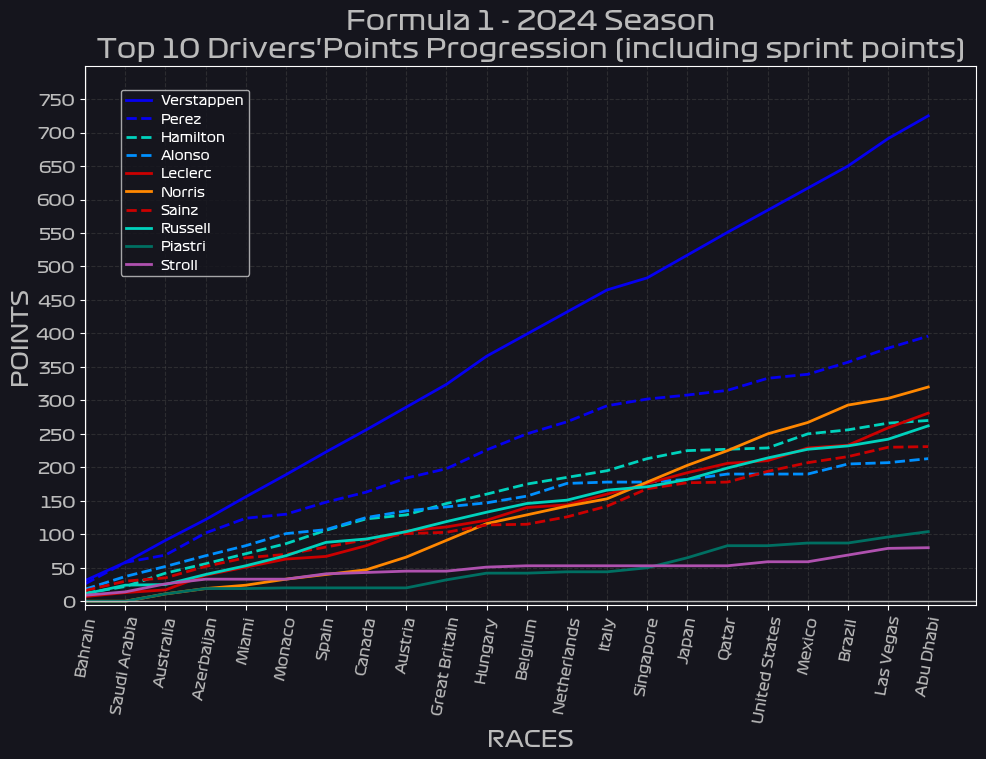

In [ ]:
tracks = season2023RaceResults['Track'].unique()
tracksSprint = season2023SprintRaceResults['Track'].unique()

plt.style.use('seaborn-v0_8-dark-palette')
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#15151d'
plt.rcParams['figure.facecolor'] = '#15151d'
plt.rcParams['grid.color'] = '#444444'
plt.rcParams['font.family'] = 'Formula1'

plt.figure(figsize=(11.5,7))
plt.axis([0, len(tracks) + 0.2, -5, 800])

c = assign_color('drivers', driverStandingsTop10)
c = c[:10]
if len(c) < 10:
    c += ['#' + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(10 - len(c))]

for i in range(10):
    if driverStandingsTop10[i] in ['Sergio Perez', 'Carlos Sainz', 'Lewis Hamilton', 'Fernando Alonso']:
        ls = '--'
    else:
        ls = '-'
    sprint_points = driverPointsTop10Sprint[driverStandingsTop10[i]]
    interpolated_sprint_points = np.interp(np.arange(len(driverPointsTop10[driverStandingsTop10[i]])), np.arange(len(sprint_points)), sprint_points)
    driver_name = driverStandingsTop10[i].split()
    if len(driver_name) > 1:
        label = driver_name[1]
    else:
        label = driver_name[0]
    plt.plot(np.cumsum(driverPointsTop10[driverStandingsTop10[i]] + interpolated_sprint_points),
             label=label, c=c[i], linewidth=2, ls=ls)

plt.title('Formula 1 - 2024 Season\nTop 10 Drivers\' Points Progression (including sprint points)',
         fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACES', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.ylabel('POINTS', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.xticks(np.arange(len(tracks)), tracks, rotation=80, fontsize=10, color='#bbbbbb')
plt.yticks(np.arange(0, 800, 50), fontsize=12, color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc=(0.04,0.61), fontsize=9)
plt.show()

**Verstappen's Dominance**
==========================

Max Verstappen is clearly the most dominant driver in the 2024 season, with a steep points progression.
His lead starts from the very beginning of the season (Bahrain) and continues to increase significantly across all races, ending the season with nearly 800 points.
The steepness of his line indicates consistent wins or podium finishes in both standard and sprint races.

**Perez in Second**
-------------------

Sergio Perez maintains a solid second place throughout the season, though his points accumulation is far behind Verstappen.
His performance is consistent, but the gap between him and Verstappen grows as the season progresses.

**Midfield Battle**
-------------------

Drivers like Lewis Hamilton, Fernando Alonso, and Charles Leclerc show a tightly contested battle for positions in the midfield.
Their lines are often close together, reflecting similar points accumulation at various stages of the season.
These drivers show fluctuations in their performance, but none challenge the top two drivers seriously.

**Consistent Mid-tier Drivers**
------------------------------

Lando Norris and Carlos Sainz are consistent in their points accumulation but remain in the middle of the pack.
They do not experience the sharp spikes in points seen with Verstappen or Perez but manage to stay ahead of the lower-ranked drivers.

**Lower Ranked Drivers**
-----------------------

Oscar Piastri and Lance Stroll have relatively flat lines compared to others, indicating fewer points gained throughout the season.
Stroll is consistently at the bottom of the top 10, showing minimal points accumulation compared to the rest.

**Steady Points Progression**
-----------------------------

The points of all drivers increase race by race, but only Verstappen's progression stands out significantly due to his dominant performance.
The mid-tier battle remains close, with several drivers accumulating points at a similar rate, indicating competitive races.

**Summary**
==========

In the 2024 season, Verstappen dominates, with an unchallenged lead from start to finish. Perez holds a clear second, while drivers like Hamilton, Alonso, and Leclerc are engaged in a competitive battle for third. Norris and Sainz show steady but less impactful performances, while Piastri and Stroll trail at the bottom of the top 10.

<ipython-input-21-41fda66ce40a>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sprintRacePointsNonZero[i]-1.7, i+0.3, "{:2}".format(sprintRacePointsNonZero[i]),


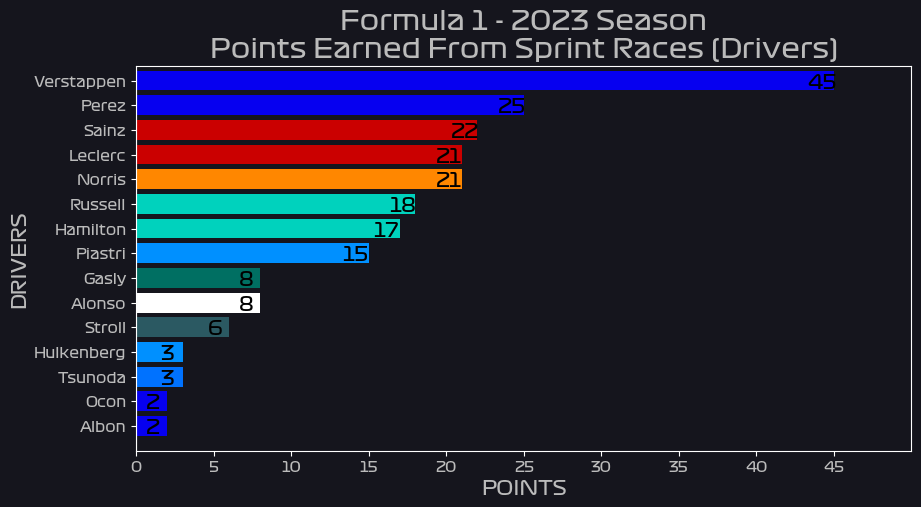

In [ ]:
sprintRacePointsNonZero = sprintRacePoints[sprintRacePoints > 0]
plt.figure(figsize=(10,5))
plt.axis([0,50,15,-0.6])
c = assign_color('drivers', sprintRacePointsNonZero.index)
plt.barh([driver.split()[1] for driver in sprintRacePointsNonZero.index.values], sprintRacePointsNonZero, color=c)
for i in range(len(sprintRacePointsNonZero)):
    plt.text(sprintRacePointsNonZero[i]-1.7, i+0.3, "{:2}".format(sprintRacePointsNonZero[i]),
             color='k', fontsize=14, fontweight='bold')
plt.title('Formula 1 - 2023 Season\nPoints Earned From Sprint Races (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('POINTS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,50,5), range(0,50,5), color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

# Detailed Insights from the Sprint Race Points Chart (2023 Season)

### 1. **Max Verstappen's Dominance (45 Points)**
   - Max Verstappen stands out with an impressive **45 points** from sprint races, far ahead of any other driver. This demonstrates his mastery over the sprint format in the 2023 season. His ability to consistently finish in top positions during these shorter, high-intensity races highlights his dominance not just in traditional Grand Prix races, but in sprints as well.

### 2. **Sergio Perez in Second Place (25 Points)**
   - **Sergio Perez**, Verstappen's Red Bull teammate, accumulated **25 points**, securing the second spot. While he performed well, there’s a significant gap of **20 points** between him and Verstappen, showing that while Red Bull was strong as a team, Verstappen was considerably better in sprints. Perez’s performance helped Red Bull maintain a solid presence in the sprint race format, though he was clearly overshadowed by his teammate.

### 3. **Close Competition for Third Place**
   - The battle for the third position was intense:
     - **Carlos Sainz** (Ferrari) finished with **22 points**.
     - **Charles Leclerc** (Ferrari) and **Lando Norris** (McLaren) tied with **21 points** each.
   - This tight grouping shows how competitive the midfield was during the sprint races. Ferrari's drivers, Sainz and Leclerc, performed nearly equally, with Sainz just edging out his teammate. Lando Norris, representing McLaren, showed that his team could compete closely with Ferrari in this format.

### 4. **Mercedes Drivers Closely Matched**
   - **George Russell** (18 points) and **Lewis Hamilton** (17 points), both driving for Mercedes, were closely matched in terms of points earned from sprint races. Russell slightly outperformed the seven-time world champion Hamilton, suggesting a competitive internal dynamic within the Mercedes team during the sprint events. This proximity in points also reflects the general performance level of Mercedes, being competitive but not at the same level as Red Bull.

### 5. **Rookie Performance: Oscar Piastri (15 Points)**
   - **Oscar Piastri**, in his debut season with McLaren, scored **15 points** in sprint races. This is a commendable achievement for a rookie, especially considering the level of competition in Formula 1. His performance suggests that he adapted quickly to the pressures of Formula 1, and he showed strong potential in the shorter sprint race format, indicating a bright future.

### 6. **Midfield Pack Competitiveness**
   - **Pierre Gasly** (Alpine) and **Fernando Alonso** (Aston Martin) both earned **8 points**, showcasing the tight competition in the midfield. Alonso, a two-time world champion, perhaps underperformed relative to expectations, given his reputation. Gasly, on the other hand, managed to perform consistently well in a competitive midfield, matching Alonso’s score. These results reflect how the midfield teams were tightly packed in terms of performance during sprint events.

### 7. **Lower Scorers Struggling with the Sprint Format**
   - Some drivers who typically score well in regular Grand Prix races struggled in sprint races:
     - **Lance Stroll** (6 points) underperformed compared to his teammate Alonso, even though they were driving for the same team, Aston Martin.
     - **Nico Hulkenberg** (Haas) and **Yuki Tsunoda** (AlphaTauri) scored **3 points** each, indicating limited success in the sprint races.
     - **Esteban Ocon** (Alpine) and **Alex Albon** (Williams) managed only **2 points** each, showing their challenges in the shorter sprint format.
   
   These lower scores could be attributed to a variety of factors, such as car performance issues, race incidents, or an inability to find the same rhythm in shorter race formats. In particular, Hulkenberg and Albon, driving for teams that generally struggled throughout the season, found it difficult to score significant points in sprint races.

### Conclusion
   - The chart highlights Verstappen's dominance in the 2023 sprint races, with clear gaps between the top drivers and the midfield. While Red Bull, particularly Verstappen, dominated the sprints, other teams like Ferrari, McLaren, and Mercedes had close competition in the mid-tier. The points distribution also reveals how some notable drivers, such as Alonso and Stroll, did not perform as strongly as expected, while rookies like Piastri impressed in their debut season.


# **Constructor Standings**

In [ ]:
racePointsTeam = season2023RaceResults.groupby('Team')['Points'].sum().sort_values(ascending=False)
sprintRacePointsTeam = season2023SprintRaceResults.groupby('Team')['Points'].sum().sort_values(ascending=False)
constructorStandings = (racePointsTeam + sprintRacePointsTeam).fillna(0).sort_values(ascending=False)
constructorStandings = pd.DataFrame(constructorStandings).reset_index()
constructorStandings['POS'] = range(1,12)
constructorStandings.set_index('POS', inplace=True)
constructorStandings

,Team,Points
POS,,
1,Red Bull Racing Honda RBPT,860.0
2,Mercedes,409.0
3,Ferrari,406.0
4,McLaren Mercedes,302.0
5,Aston Martin Aramco Mercedes,280.0
6,Alpine Renault,120.0
7,Williams Mercedes,28.0
8,AlphaTauri Honda RBPT,25.0
9,Alfa Romeo Ferrari,16.0


In [ ]:
teamNames = constructorStandings['Team'].unique()
teamPoints = {};   teamPointsSprint = {}
trackTeamPtsMerged = season2023RaceResults.groupby(['Track','Team'])['Points'].sum()
trackTeamPtsSprintMerged = season2023SprintRaceResults.groupby(['Track','Team'])['Points'].sum()

for team in teamNames:
    if team in trackTeamPtsMerged.index.get_level_values('Team'):
        teamPoints[team] = trackTeamPtsMerged[slice(None), team].reindex(tracks).values
    else:
        teamPoints[team] = np.zeros(len(tracks))

    if team in trackTeamPtsSprintMerged.index.get_level_values('Team'):
        teamPointsSprint[team] = trackTeamPtsSprintMerged[slice(None), team].reindex(tracksSprint).values
    else:
        teamPointsSprint[team] = np.zeros(len(tracksSprint))
sp = [3, 10, 20]
for team in teamNames:
    for i in range(len(sp)):
        teamPoints[team][sp[i]] = teamPoints[team][sp[i]] + teamPointsSprint[team][i]

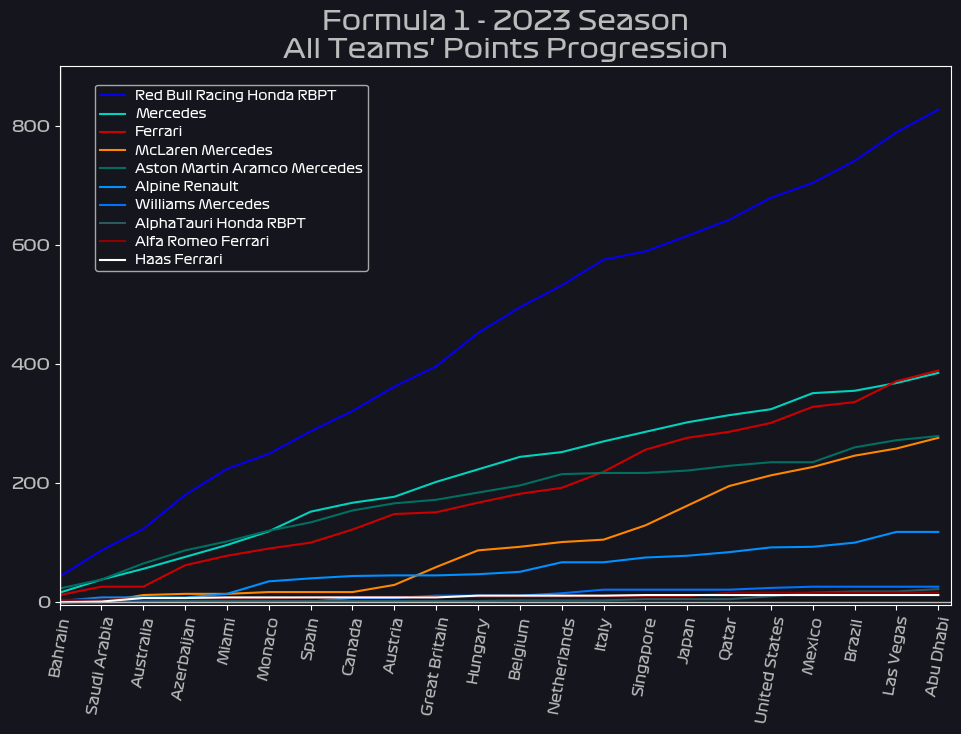

In [ ]:
c = assign_color('teams', teamNames)
plt.figure(figsize=(11.5,7))
plt.axis([0.2,21.3,-5,900])
for i in range(10):
    plt.plot(teamPoints[teamNames[i]].cumsum(), color=c[i], label=teamNames[i])
plt.title('Formula 1 - 2023 Season\nAll Teams\' Points Progression', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,len(tracks)), tracks, rotation=80, fontsize=10, color='#bbbbbb')
plt.yticks(fontsize=12, color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.legend(loc=(0.04,0.62), fontsize=9)
plt.show()

# Main Insights and Elaboration from the 2023 Teams' Points Progression Chart

### 1. **Red Bull Racing's Dominance**
   - **Red Bull Racing** (blue line) dominated the 2023 season, accumulating points rapidly and consistently. They pulled ahead early in the season and extended their lead race after race, finishing with over **800 points**. This shows how both Red Bull drivers, especially Max Verstappen, were consistently performing at a high level, leading to their overwhelming success in both the drivers' and constructors' championships.

### 2. **Close Battle Between Ferrari and Mercedes**
   - **Ferrari** (red) and **Mercedes** (teal) were engaged in a fierce fight throughout the season. Early on, Ferrari had the upper hand, starting strong in the first half of the season. However, **Mercedes** improved as the season progressed, particularly in the second half, eventually surpassing Ferrari by a small margin in the constructors' standings. This battle reflects Ferrari’s early-season promise contrasted with Mercedes’ development and recovery after a slow start.

### 3. **McLaren vs Alpine for Fourth**
   - **McLaren** (orange) and **Alpine** (light blue) had an intense mid-field rivalry. The two teams were close in points throughout the season, but Alpine managed to outpace McLaren towards the end of the season, securing fourth place in the constructors’ standings. Alpine’s curve steepened in the latter races, indicating stronger performances, while McLaren's progression flattened out toward the end.

### 4. **Aston Martin's Mid-Season Improvement**
   - **Aston Martin** (green) had a slow start to the season but demonstrated noticeable improvement from mid-season onwards. Their points progression line steepened in the latter half, showing that the team had managed to make significant gains and finished stronger than they started. This indicates they addressed their early struggles and improved the car's performance over the season.

### 5. **Midfield vs. Top Teams Gap**
   - The gap between the top teams (Red Bull, Ferrari, Mercedes) and the midfield teams (McLaren, Alpine, Aston Martin) was significant. The lines representing the top teams are far steeper, indicating much higher point accumulation. In contrast, the midfield teams had a slower rate of increase in points, highlighting the performance disparity between the top contenders and the midfield.

### 6. **Struggles of the Lower Teams**
   - Teams like **AlphaTauri** (dark blue), **Alfa Romeo** (dark red), **Williams** (dark cyan), and **Haas** (white) had flatter points progression lines throughout the season. These teams struggled to earn significant points, as their cars were less competitive. **Haas** and **Williams**, in particular, barely accumulated points, reflecting their difficulty in competing with both the midfield and top teams.

### Elaboration:
- **Red Bull's dominance** signifies the superiority of their car, strategy, and driver performance. Their rapid rise in points after each race left no room for competition.
- The **Ferrari vs Mercedes battle** highlights two contrasting team narratives: Ferrari’s early pace but lack of consistency, and Mercedes’ gradual improvement through upgrades and strategy refinement.
- **Alpine's late surge** against McLaren illustrates how development through a season can change team standings, emphasizing Alpine's stronger finish and McLaren’s struggle to maintain momentum.
- **Aston Martin’s late-season recovery** is a testament to a team that worked on its weaknesses, showing how a slow start doesn’t define the entire season if improvements are made effectively.
- The clear separation between **top teams** and the **midfield** reflects a long-standing issue in Formula 1 where budget, resources, and car development create a distinct tiering in performance.
- **Lower teams’ struggles** demonstrate how teams with fewer resources or less competitive cars remain confined to minimal points, especially in a season where the top teams consistently finish in the points positions.

Overall, the chart reflects the competitive dynamics of the 2022 Formula 1 season, with Red Bull’s overwhelming success, close battles in the midfield, and struggles for teams at the bottom of the standings.


# **Race Results**

In [ ]:
season2023RaceResults[season2023RaceResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,
Bahrain,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,1:36.236
Saudi Arabia,11,Sergio Perez,Red Bull Racing Honda RBPT,1,50,1:21:14.894,25,No,1:32.188
Australia,1,Max Verstappen,Red Bull Racing Honda RBPT,1,58,2:32:28.371,25,No,1:20.342
Azerbaijan,11,Sergio Perez,Red Bull Racing Honda RBPT,3,51,1:32:42.436,25,No,1:44.589
Miami,1,Max Verstappen,Red Bull Racing Honda RBPT,9,57,1:27:38.241,26,Yes,1:29.708
Monaco,1,Max Verstappen,Red Bull Racing Honda RBPT,1,78,1:48:51.980,25,No,1:16.604
Spain,1,Max Verstappen,Red Bull Racing Honda RBPT,1,66,1:27:57.940,26,Yes,1:16.330
Canada,1,Max Verstappen,Red Bull Racing Honda RBPT,1,70,1:33:58.348,25,No,1:15.594
Austria,1,Max Verstappen,Red Bull Racing Honda RBPT,1,71,1:25:33.607,26,Yes,1:07.012


<ipython-input-52-2717567a0f2d>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(winners[i]-1.3, i+0.15, "{:>3}".format(winners[i]), fontsize=19, fontweight='bold', color='k')


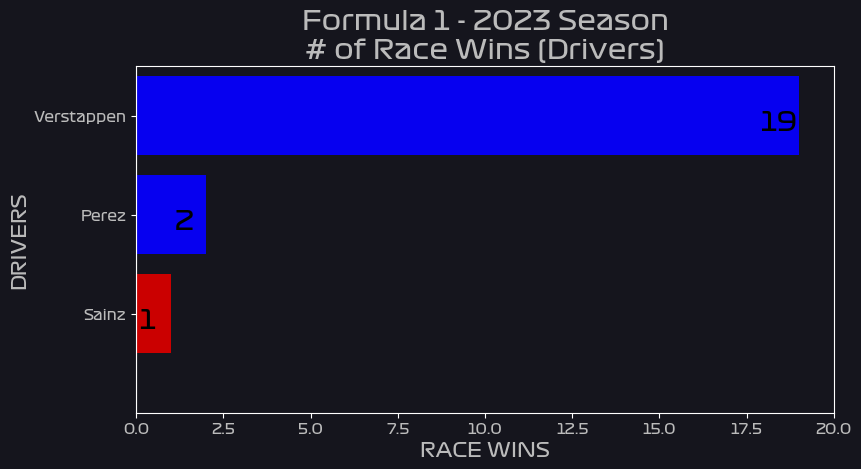

In [ ]:
winners = season2023RaceResults[season2023RaceResults['Position'] == '1']['Driver'].value_counts()
c = assign_color('drivers', winners.index)
plt.figure(figsize=(9,4.5))
plt.axis([0,20,3,-0.5])
plt.barh([driver.split()[1] for driver in winners.index], winners, color=c)
for i in range(len(winners)):
    plt.text(winners[i]-1.3, i+0.15, "{:>3}".format(winners[i]), fontsize=19, fontweight='bold', color='k')
plt.title('Formula 1 - 2023 Season\n# of Race Wins (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACE WINS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

# Main Insights and Elaboration from 2023 F1 Race Wins (Drivers)

### 1. **Max Verstappen's Dominance with 19 Wins**
   - **Max Verstappen** completely dominated the 2023 season with an astounding **19 race wins**. This overwhelming number of victories highlights his unmatched performance throughout the year. His consistency and control over the championship made him the standout driver by a significant margin, likely contributing to his championship win. He won almost all of the races in the season, leaving little room for other drivers to challenge him.

### 2. **Sergio Perez's 2 Wins**
   - **Sergio Perez**, Verstappen's teammate at Red Bull, secured **2 wins** during the season. Although far behind Verstappen's 19 victories, Perez’s two wins demonstrate that while he could occasionally challenge for wins, his performance was inconsistent compared to his dominant teammate. His position further reflects Red Bull’s general dominance as a team, with both drivers contributing to their success, though Verstappen was the primary force.

### 3. **Carlos Sainz's Single Win**
   - **Carlos Sainz** (Ferrari) managed **1 win** throughout the season. This shows that Ferrari had moments of competitiveness but generally struggled to consistently match the pace of Red Bull. Sainz’s single victory highlights Ferrari’s efforts to compete against Red Bull but also reflects the challenge they faced in keeping up with Red Bull’s superior performance.

### Elaboration:
- **Verstappen’s 19 wins** underline his total control over the 2023 season, both in terms of driving skill and the technical superiority of the Red Bull car. Winning the majority of races allowed Verstappen to dominate the championship early, showcasing his ability to adapt to different circuits and conditions. His form also highlights the lack of serious competition throughout most of the season.
- **Perez’s 2 wins**, while noteworthy, show a large gap in performance compared to his teammate. Despite driving the same car, Perez's inability to consistently challenge Verstappen illustrates the stark difference in individual performance within Red Bull.
- **Sainz’s sole win** shows that Ferrari could compete at certain points during the season, but their performance was largely inconsistent. This win may represent a rare opportunity where Ferrari capitalized on factors like strategy or misfortune from Red Bull, but it was not indicative of a season-long challenge.

Overall, this chart clearly reflects Verstappen’s unprecedented dominance in the 2023 season, with minimal wins shared among other drivers.


# **Pole Position**

In [ ]:
season2023PolePos = season2023RaceResults[season2023RaceResults['Starting Grid'] == 1].set_index('Track')
polePos = {}
for driver in season2023PolePos['Driver']:
    if driver not in polePos:   polePos[driver] = 1
    else:   polePos[driver] += 1
season2023PolePos

,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,,
Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,1:36.236
Saudi Arabia,1,11,Sergio Perez,Red Bull Racing Honda RBPT,1,50,1:21:14.894,25,No,1:32.188
Australia,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,58,2:32:28.371,25,No,1:20.342
Azerbaijan,3,16,Charles Leclerc,Ferrari,1,51,+21.217,15,No,1:44.561
Miami,2,11,Sergio Perez,Red Bull Racing Honda RBPT,1,57,+5.384,18,No,1:30.560
Monaco,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,78,1:48:51.980,25,No,1:16.604
Spain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,66,1:27:57.940,26,Yes,1:16.330
Canada,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,70,1:33:58.348,25,No,1:15.594
Austria,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,71,1:25:33.607,26,Yes,1:07.012


# **Sprint Pole Position**

In [ ]:
season2023PolePosSprint = season2023SprintRaceResults[season2023SprintRaceResults['Starting Grid'] == 1] \
    .set_index('Track').drop('Starting Grid', axis=1)
polePosSprint = {}
for driver in season2023PolePosSprint['Driver']:
    if driver not in polePos:   polePos[driver] = 1
    else:   polePos[driver] += 1
season2023PolePosSprint

,Position,No,Driver,Team,Laps,Time/Retired,Points
Track,,,,,,,
Azerbaijan,2,16,Charles Leclerc,Ferrari,17,+4.463,7
Austria,1,1,Max Verstappen,Red Bull Racing Honda RBPT,24,30:26.730,8
Belgium,1,1,Max Verstappen,Red Bull Racing Honda RBPT,11,24:58.433,8
Qatar,1,81,Oscar Piastri,McLaren Mercedes,19,35:01.297,8
United States,1,1,Max Verstappen,Red Bull Racing Honda RBPT,19,31:30.849,8
Brazil,2,4,Lando Norris,McLaren Mercedes,24,+4.287,7


<ipython-input-34-bab5d28710c1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(polePositions[i]-0.9, i+0.15, polePositions[i], fontsize=18, fontweight='bold', color='k')


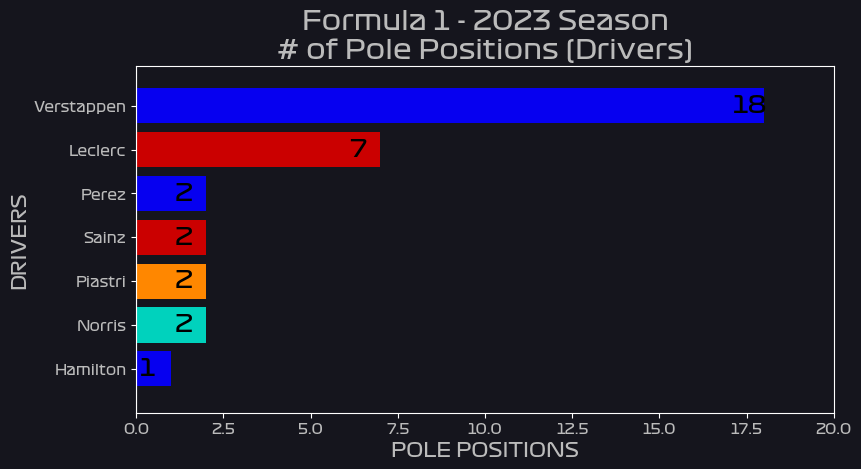

In [ ]:
polePositions = pd.Series(polePos).sort_values(ascending=False)
c = assign_color('drivers', polePositions.index)
plt.figure(figsize=(9,4.5))
plt.axis([0,20,7,-0.9])
plt.barh([driver.split()[1] for driver in polePositions.index], polePositions, color=c)
plt.title('Formula 1 - 2023 Season\n# of Pole Positions (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
for i in range(len(polePositions)):
    plt.text(polePositions[i]-0.9, i+0.15, polePositions[i], fontsize=18, fontweight='bold', color='k')
plt.xlabel('POLE POSITIONS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

# Formula 1 - 2023 Season Pole Positions Insights

1. **Verstappen's Dominance**
   - Max Verstappen secured **15 pole positions**, far more than any other driver.
   - This reflects his **exceptional qualifying pace** and Red Bull's strong car performance.
   - Verstappen's dominance in qualifying set the stage for many of his race victories.

2. **Ferrari's Strong Qualifying**
   - **Charles Leclerc** managed to claim **6 pole positions**, the second-highest number in the season.
   - **Carlos Sainz** also contributed with **2 pole positions**.
   - Ferrari showcased a strong overall qualifying performance, indicating that they often had the pace to challenge for pole but couldn't always convert it into race wins.

3. **Limited Competition at the Top**
   - Only **7 drivers** managed to secure a pole position throughout the entire season.
   - This highlights the **concentration of qualifying performance** among a few top drivers and teams, with most pole positions coming from Red Bull and Ferrari.

4. **Unexpected Performances**
   - **Kevin Magnussen** (Haas) and **Lando Norris** (McLaren) each achieved **1 pole position**.
   - These results were unexpected and represent **breakthrough performances from midfield teams**, showing that on certain weekends, smaller teams can outperform expectations.

5. **Hamilton's Struggles**
   - **Lewis Hamilton** only secured **1 pole position** during the season, a significant decline from his usual performance in previous years.
   - This reflects **Mercedes' struggles** throughout the 2023 season, as they couldn't consistently compete for pole positions like they had in the past.

These insights highlight the competitive landscape of the 2023 Formula 1 season in qualifying, with Verstappen and Red Bull showing clear superiority, while Ferrari remained competitive and other teams had occasional standout performances.


<ipython-input-56-0a8ca397ed02>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(podiumFinishes[i]-1.18, i+0.2, "{:>3}".format(podiumFinishes[i]), fontsize=16, fontweight='bold', color='k')


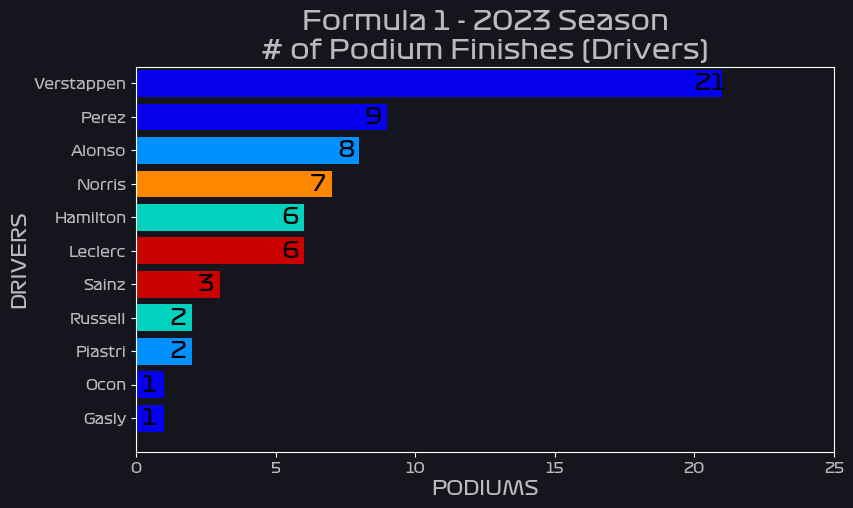

In [ ]:
podiumFinishes = season2023RaceResults[season2023RaceResults['Position'].isin(['1','2','3'])]['Driver'].value_counts()
c = assign_color('drivers', podiumFinishes.index)
plt.figure(figsize=(9,5))
plt.axis([0,25,11,-0.5])
plt.barh([driver.split()[1] for driver in podiumFinishes.index], podiumFinishes, color=c)
for i in range(len(podiumFinishes)):
    plt.text(podiumFinishes[i]-1.18, i+0.2, "{:>3}".format(podiumFinishes[i]), fontsize=16, fontweight='bold', color='k')
plt.title('Formula 1 - 2023 Season\n# of Podium Finishes (Drivers)', fontsize=19, weight='bold', color='#bbbbbb')
plt.xlabel('PODIUMS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

# Formula 1 - 2023 Season Podium Finishes Insights

1. **Verstappen's Dominance**
   - **Max Verstappen** achieved an extraordinary **21 podium finishes**, far surpassing any other driver.
   - This reflects his **exceptional consistency** and performance throughout the season, solidifying his dominance in the championship.

2. **Red Bull's Strength**
   - With Verstappen’s 21 podiums and **Sergio Perez** securing **9 podiums**, **Red Bull Racing** demonstrated they had the strongest overall package.
   - Both drivers frequently finished in top positions, highlighting Red Bull’s competitive edge throughout the season.

3. **Alonso’s Resurgence**
   - **Fernando Alonso** managed to secure **8 podium finishes**, signaling a **resurgence** for both Aston Martin and Alonso himself.
   - This indicates a strong performance from the veteran driver and his team, competing effectively at the front of the grid.

4. **Tight Midfield Battle**
   - Several drivers, including **Lando Norris**, **Lewis Hamilton**, and **Charles Leclerc**, achieved a close number of podium finishes.
   - This reflects a **competitive midfield**, with multiple teams and drivers capable of reaching the podium at different stages of the season.

5. **Ferrari’s Struggles**
   - **Charles Leclerc** achieved **6 podiums**, while **Carlos Sainz** only managed **3**, suggesting that Ferrari had a less competitive season compared to their 2022 performance.
   - This indicates struggles in both performance and consistency for Ferrari throughout the year.

6. **Mercedes Consistency**
   - Both **Lewis Hamilton** and **George Russell** consistently reached the podium, showing that **Mercedes** maintained a level of competitiveness, even if they were not as dominant as in previous years.
   - Their podium finishes reflect the team’s ability to compete regularly, even if they couldn't match Red Bull’s level of performance.

### Conclusion:
The 2023 season was **dominated by Red Bull**, particularly through Verstappen’s exceptional form. However, there was a competitive battle for the remaining podium positions among the midfield teams. The season also saw a resurgence for Fernando Alonso and Aston Martin, while Ferrari and Mercedes experienced varied levels of success compared to previous seasons.


<ipython-input-57-62f9439f9377>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(top10Finishes[i]-0.9, i+0.25, "{:>3}".format(top10Finishes[i]), fontsize=12, fontweight='bold', color='k')


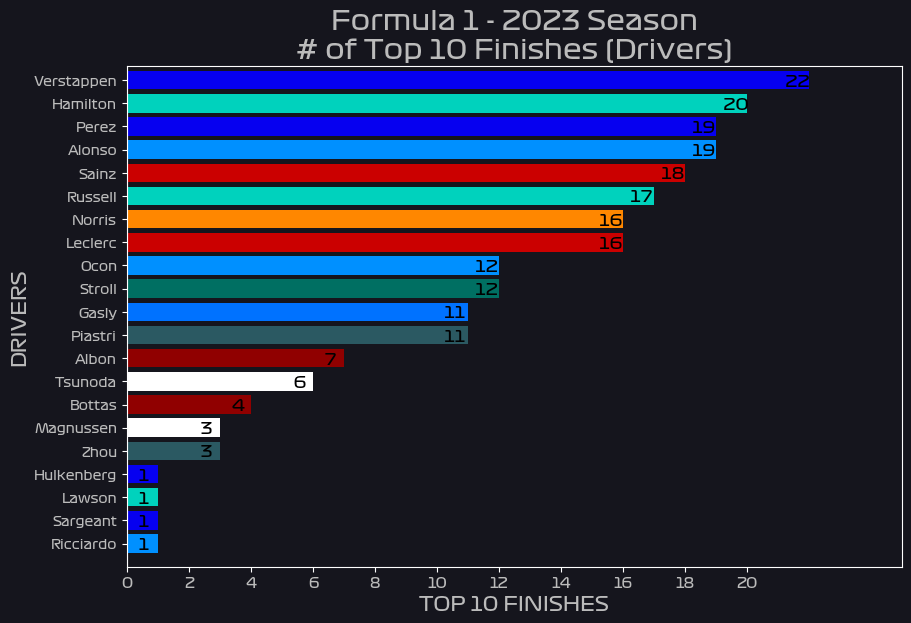

In [ ]:
top10Finishes = season2023RaceResults[season2023RaceResults['Position'].isin([str(i) for i in range(1,11)])] \
                ['Driver'].value_counts()
c = assign_color('drivers', top10Finishes.index)
plt.figure(figsize=(10,6.5))
plt.axis([0,25,21,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in top10Finishes.index], top10Finishes, color=c)
for i in range(len(top10Finishes)):
    plt.text(top10Finishes[i]-0.9, i+0.25, "{:>3}".format(top10Finishes[i]), fontsize=12, fontweight='bold', color='k')
plt.title('Formula 1 - 2023 Season\n# of Top 10 Finishes (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('TOP 10 FINISHES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,22,2), range(0,22,2), color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

# Formula 1 - 2023 Season Top 10 Finishes

## 1. Verstappen's Exceptional Season
- 22 top 10 finishes (potentially perfect record)
- Indicates dominant championship performance

## 2. Mercedes' Resurgence
- Hamilton: 20 top 10 finishes
- Russell: 17 top 10 finishes
- Significant improvement from 2022 struggles

## 3. Red Bull's Strong Package
- Verstappen: 22 top 10 finishes
- Perez: 19 top 10 finishes
- Most competitive car on the grid

## 4. Alonso's Renaissance
- 19 top 10 finishes
- Demonstrates top-tier performance
- Significant improvement for Aston Martin

## 5. Ferrari's Consistency Issues
- Sainz: 18 top 10 finishes
- Leclerc: 16 top 10 finishes
- Suggests potential reliability or strategic challenges

## 6. Tight Midfield Battle
- Sainz, Russell, Norris, Leclerc: 16-18 top 10 finishes each
- Highly competitive midfield

## 7. Alpine's Solid Performance
- Ocon and Gasly: 11+ top 10 finishes each
- Consistent points-scoring presence

## 8. Struggles of Bottom Teams
- Magnussen, Zhou, Hulkenberg: ≤5 top 10 finishes
- Illustrates performance gap in current F1

## 9. Rookie Performances
- Piastri: 11 top 10 finishes (promising)
- Sargeant: 1 top 10 finish (steeper learning curve)

## 10. Midseason Driver Changes
- Lawson, Ricciardo: 1 top 10 finish each
- Suggests dynamic driver lineup changes during the season

This analysis provides a comprehensive overview of the 2023 F1 season's competitive landscape, team performances, and individual driver achievements.

# **Qualifying Results**

In [ ]:
season2023QualifyingResults[season2023QualifyingResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)

,No,Driver,Team,Q1,Q2,Q3,Laps
Track,,,,,,,
Bahrain,1,Max Verstappen,Red Bull Racing Honda RBPT,1:31.295,1:30.503,1:29.708,15
Saudi Arabia,11,Sergio Perez,Red Bull Racing Honda RBPT,1:29.244,1:28.635,1:28.265,18
Australia,1,Max Verstappen,Red Bull Racing Honda RBPT,1:17.384,1:17.056,1:16.732,24
Azerbaijan,16,Charles Leclerc,Ferrari,1:41.269,1:41.037,1:40.203,21
Miami,11,Sergio Perez,Red Bull Racing Honda RBPT,1:27.713,1:27.328,1:26.841,20
Monaco,1,Max Verstappen,Red Bull Racing Honda RBPT,1:12.386,1:11.908,1:11.365,30
Spain,1,Max Verstappen,Red Bull Racing Honda RBPT,1:13.615,1:12.760,1:12.272,20
Canada,1,Max Verstappen,Red Bull Racing Honda RBPT,1:20.851,1:19.092,1:25.858,26
Austria,1,Max Verstappen,Red Bull Racing Honda RBPT,1:05.116,1:04.951,1:04.391,24


<ipython-input-35-6d60c30ffcbc>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(fastestTimeQualifying[i]-0.59, i+0.15, fastestTimeQualifying[i], fontsize=17, fontweight='bold', color='k')


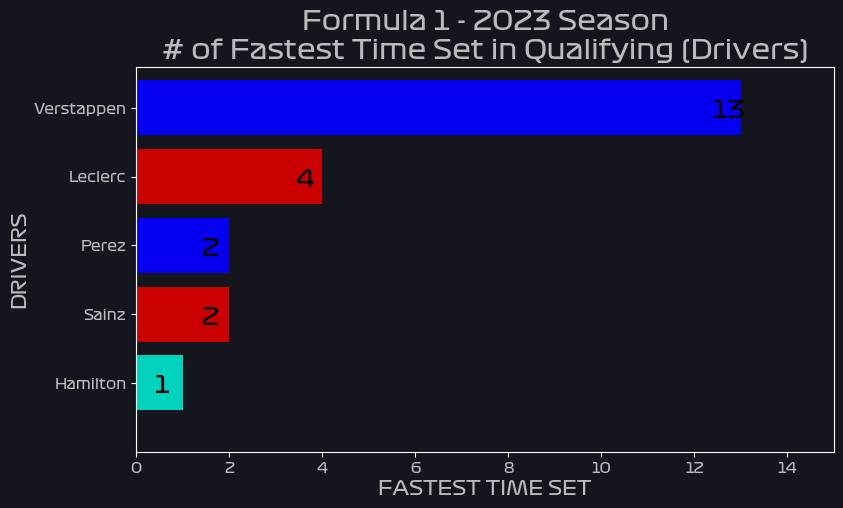

In [ ]:
fastestTimeQualifying = season2023QualifyingResults[season2023QualifyingResults['Position'] == '1']['Driver'].value_counts()
c = assign_color('drivers', fastestTimeQualifying.index)
plt.figure(figsize=(9,5))
plt.axis([0,15,5,-0.6])
plt.barh([driver.split()[1] for driver in fastestTimeQualifying.index], fastestTimeQualifying, color=c)
for i in range(len(fastestTimeQualifying)):
    plt.text(fastestTimeQualifying[i]-0.59, i+0.15, fastestTimeQualifying[i], fontsize=17, fontweight='bold', color='k')
plt.title('Formula 1 - 2023 Season\n# of Fastest Time Set in Qualifying (Drivers)', fontsize=19, fontweight='bold',
          color='#bbbbbb')
plt.xlabel('FASTEST TIME SET', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

# Formula 1 - 2023 Season Fastest Qualifying Times Insights

1. **Verstappen's Dominance**
   - **Max Verstappen** set the fastest qualifying time in **13 out of 22 races**, showcasing his and Red Bull’s exceptional one-lap pace.
   - This dominance in qualifying likely translated into numerous pole positions and **advantageous race starts**, helping to cement Verstappen’s control over the season.

2. **Ferrari's Competitiveness**
   - **Charles Leclerc** and **Carlos Sainz** combined for **6 fastest qualifying times** (Leclerc with 4, Sainz with 2).
   - This indicates that **Ferrari** had a car capable of challenging for pole positions throughout the season, though their race-day performance may have varied.

3. **Red Bull's Overall Strength**
   - With Verstappen’s 13 fastest laps and **Sergio Perez** adding **2 fastest times**, **Red Bull secured 15 out of 22 fastest qualifying sessions**.
   - This dominance highlights Red Bull’s **superior overall package** in terms of both pace and car setup.

4. **Mercedes' Struggles**
   - **Lewis Hamilton** managed only **1 fastest qualifying time**, a significant drop compared to previous seasons when Mercedes was more dominant.
   - This reflects **Mercedes’ difficulties** in adapting to the new 2023 regulations and staying competitive in qualifying against Red Bull and Ferrari.

5. **Limited Top Performers**
   - Only **5 drivers** set fastest qualifying times during the entire season, indicating a **substantial performance gap** between the top teams (Red Bull and Ferrari) and the rest of the field.
   - This limited number of top performers underscores the **two-team dominance** in qualifying.

6. **Leclerc vs. Sainz**
   - Within Ferrari, **Charles Leclerc** outperformed **Carlos Sainz** in qualifying, setting **twice as many fastest times** (4 vs. 2).
   - This reflects Leclerc’s edge in **one-lap pace**, showcasing his ability to maximize the car’s potential in qualifying.

7. **Perez’s Contribution**
   - **Sergio Perez** secured **2 fastest qualifying times**, showing that he was able to capitalize on the Red Bull car’s potential on occasion.
   - However, he was not as consistent as Verstappen, reflecting the gap between the two Red Bull drivers in qualifying performance.

8. **Absence of Other Teams**
   - The lack of fastest qualifying times from teams like **McLaren**, **Alpine**, and **Aston Martin** highlights the **dominance of Red Bull and Ferrari** in the 2023 season.
   - No other teams managed to set the fastest times, showing how the **competitive gap** in qualifying limited the field to only a few top contenders.

### Conclusion:
The 2023 Formula 1 season’s qualifying sessions were largely **dominated by Red Bull and Ferrari**, with Verstappen and Leclerc leading their teams. While Red Bull’s overall strength was clear, Ferrari remained competitive in qualifying, but Mercedes and other teams struggled to match the top two. Verstappen’s consistency in setting fastest laps and starting from pole contributed significantly to his dominance, while Leclerc and Ferrari put up a fight in one-lap performance.


<ipython-input-36-1a5d5778b9de>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(qualiQ2[i]-0.75, i+0.24, "{:>2}".format(qualiQ2[i]), fontsize=12, fontweight='bold', color='k')


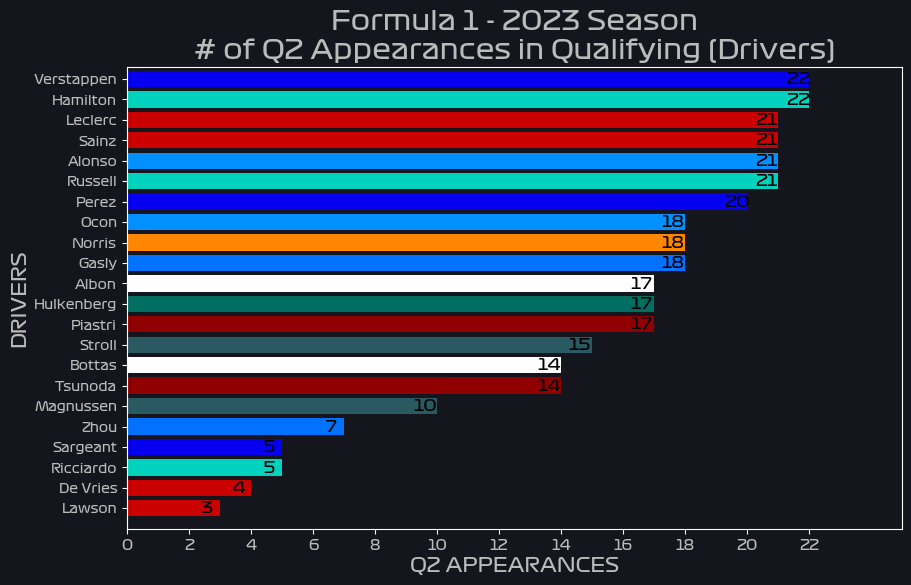

In [ ]:
qualiQ2 = season2023QualifyingResults[season2023QualifyingResults['Position'].isin([str(i) for i in range(1,16)])] \
    ['Driver'].value_counts()
c = assign_color('drivers', qualiQ2.index)
plt.figure(figsize=(10,6))
plt.axis([0,25,22,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in qualiQ2.index], qualiQ2, color=c)
for i in range(len(qualiQ2)):
    plt.text(qualiQ2[i]-0.75, i+0.24, "{:>2}".format(qualiQ2[i]), fontsize=12, fontweight='bold', color='k')
plt.title("Formula 1 - 2023 Season\n# of Q2 Appearances in Qualifying (Drivers)", fontsize=19,
          fontweight='bold', color='#bbbbbb')
plt.xlabel('Q2 APPEARANCES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,23,2), range(0,23,2), color='#bbbbbb')
plt.yticks(fontsize=9, color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

# **Formula 1 - 2023 Season Number of Q2 Appearances in Qualifying (Drivers)**

**Dominance and Consistency**
=============================

Verstappen and Hamilton: The chart clearly demonstrates the dominance of Max Verstappen and Lewis Hamilton. Both drivers have appeared in Q2 a significant number of times, showcasing their exceptional qualifying performances throughout the season. Verstappen's 22 appearances highlight his consistent ability to secure a place in the second qualifying session.

**Close Competition**
---------------------

Leclerc, Sainz, Alonso, and Russell: Following closely behind Verstappen and Hamilton are Charles Leclerc, Carlos Sainz, Fernando Alonso, and George Russell. These drivers have also made consistent appearances in Q2, indicating a high level of competition among the top teams.

**Midfield Battle**
-------------------

Perez, Ocon, Norris, Gasly, Albon, Hulkenberg: The midfield drivers, including Sergio Perez, Esteban Ocon, Lando Norris, Pierre Gasly, Alex Albon, and Nico Hulkenberg, have shown a decent level of performance in qualifying. Their appearances in Q2 suggest that the competition in the midfield was also intense.

**Variability in Performance**
-----------------------------

Piastri, Stroll, Bottas, Tsunoda, Magnussen: Drivers like Oscar Piastri, Lance Stroll, Valtteri Bottas, Yuki Tsunoda, and Kevin Magnussen experienced some fluctuations in their qualifying performances. While they managed to secure Q2 appearances on multiple occasions, their numbers were slightly lower compared to the top contenders.

**Struggling Drivers**
---------------------

Zhou, Sargeant, Ricciardo, De Vries, Lawson: Zhou Guanyu, Logan Sargeant, Daniel Ricciardo, Nyck de Vries, and Liam Lawson faced challenges in qualifying, with significantly fewer Q2 appearances. These drivers might have struggled to adapt to the demands of Formula 1 or encountered difficulties with their cars or teams.

<ipython-input-37-1917fc4b62fc>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(qualiQ3[i]-0.75, i+0.24, "{:>2}".format(qualiQ3[i]), fontsize=12, fontweight='bold', color='k')


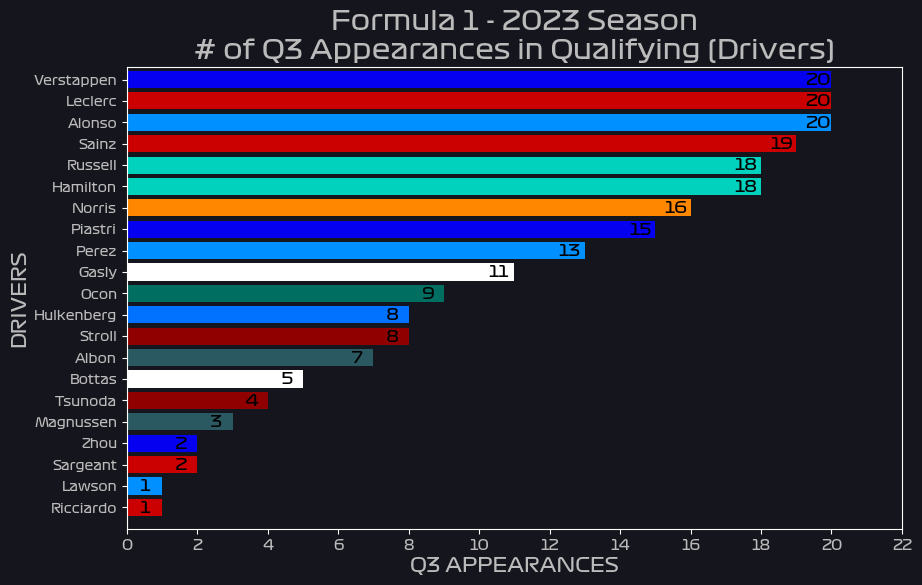

In [ ]:
qualiQ3 = season2023QualifyingResults[season2023QualifyingResults['Position'].isin([str(i) for i in range(1,11)])] \
    ['Driver'].value_counts()
c = assign_color('drivers', qualiQ3.index)
plt.figure(figsize=(10,6))
plt.axis([0,22,21,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in qualiQ3.index], qualiQ3, color=c)
for i in range(len(qualiQ3)):
    plt.text(qualiQ3[i]-0.75, i+0.24, "{:>2}".format(qualiQ3[i]), fontsize=12, fontweight='bold', color='k')
plt.title("Formula 1 - 2023 Season\n# of Q3 Appearances in Qualifying (Drivers)", fontsize=19,
          fontweight='bold', color='#bbbbbb')
plt.xlabel('Q3 APPEARANCES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,23,2), range(0,23,2), color='#bbbbbb')
plt.yticks(fontsize=9, color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

**Elaborated Insights from the Formula 1 2023 Season Q3 Appearances Chart**
=====================================================================

**Dominance and Consistency**
=============================

Verstappen, Leclerc, and Alonso: The chart highlights the exceptional qualifying performances of Max Verstappen, Charles Leclerc, and Fernando Alonso. Their consistent appearances in Q3 underscore their dominance and ability to secure top starting positions throughout the season.

**Close Competition**
---------------------

Sainz, Russell, and Hamilton: Following closely behind the top three are Carlos Sainz, George Russell, and Lewis Hamilton. These drivers have also made significant appearances in Q3, showcasing a competitive level of qualifying performance.

**Midfield Battle**
-------------------

Norris, Piastri, Perez, Gasly: The midfield drivers, including Lando Norris, Oscar Piastri, Sergio Perez, and Pierre Gasly, have demonstrated solid qualifying performances, with multiple appearances in Q3. This indicates a competitive and dynamic midfield battle.

**Variability in Performance**
-----------------------------

Ocon, Hulkenberg, Stroll, Albon, Bottas, Tsunoda: Drivers like Esteban Ocon, Nico Hulkenberg, Lance Stroll, Alex Albon, Valtteri Bottas, and Yuki Tsunoda experienced some fluctuations in their qualifying performances. While they secured Q3 appearances on several occasions, their numbers were lower compared to the top contenders.

**Struggling Drivers**
---------------------

Magnussen, Zhou, Sargeant, Lawson, Ricciardo: Zhou Guanyu, Logan Sargeant, Kevin Magnussen, Nyck de Vries, and Liam Lawson faced significant challenges in qualifying, with very few Q3 appearances. These drivers might have struggled to adapt to the demands of Formula 1 or encountered difficulties with their cars or teams.

<ipython-input-38-29e2d41c2b9c>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(DNFdriver[i]-0.17, i+0.22, DNFdriver[i], fontsize=12, fontweight='bold', color='k')


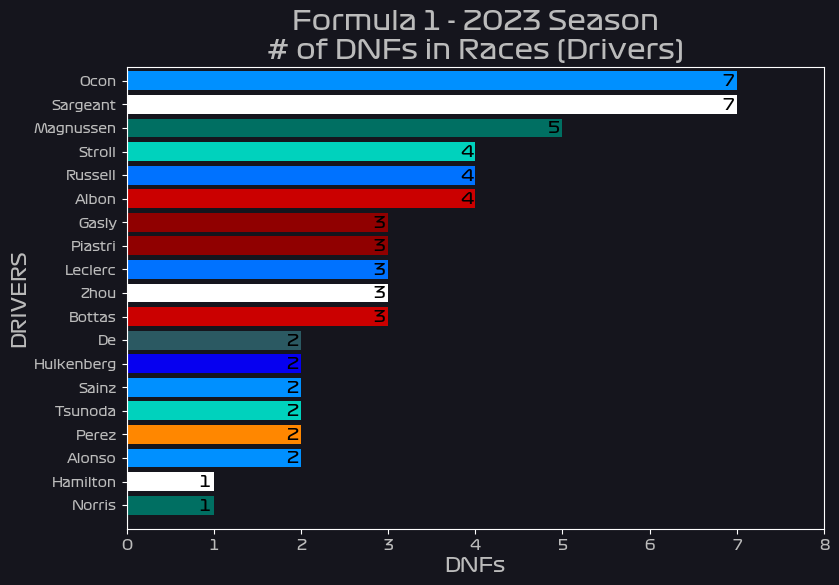

In [ ]:
DNFdriver = season2023RaceResults[season2023RaceResults['Time/Retired'] == 'DNF']['Driver'].value_counts()
c = assign_color('drivers', DNFdriver.index)
plt.figure(figsize=(9,6))
plt.axis([0,8,19,-0.6])
plt.barh([driver.split()[1] for driver in DNFdriver.index], DNFdriver, color=c)
for i in range(len(DNFdriver)):
    plt.text(DNFdriver[i]-0.17, i+0.22, DNFdriver[i], fontsize=12, fontweight='bold', color='k')
plt.title('Formula 1 - 2023 Season\n# of DNFs in Races (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('DNFs', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

**Elaborated Insights from the Formula 1 2023 Season DNFs Chart**
=====================================================================

**Reliability Issues**
---------------------

Ocon and Sargeant: The chart highlights the reliability concerns for Esteban Ocon and Logan Sargeant, both of whom experienced a significant number of DNFs (7 each). This suggests potential mechanical issues or driver errors that contributed to their retirements.

**Consistent Performance**
-------------------------

Magnussen, Stroll, Russell, and Albon: A group of drivers, including Kevin Magnussen, Lance Stroll, George Russell, and Alex Albon, demonstrated relatively consistent performance with 4 DNFs each. While they faced some reliability issues, their overall performance was more stable compared to the top two.

**Midfield Challenges**
----------------------

Piastri, Leclerc, Zhou, Bottas, De, Hulkenberg: The midfield drivers, including Oscar Piastri, Charles Leclerc, Zhou Guanyu, Valtteri Bottas, Nyck de Vries, and Nico Hulkenberg, faced their fair share of reliability problems. This suggests that the midfield competition was not only close on the track but also in terms of car reliability.

**Variability in Performance**
-----------------------------

Sainz, Tsunoda, Perez, Alonso, Hamilton, Norris: Drivers like Carlos Sainz, Yuki Tsunoda, Sergio Perez, Fernando Alonso, Lewis Hamilton, and Lando Norris experienced a mix of reliability issues and strong performances. Their DNF numbers were relatively low, indicating a balance between reliability and competitiveness.

<ipython-input-63-9212f7360dec>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(DNFtrack[i]-0.18, i+0.22, DNFtrack[i], fontsize=12, fontweight='bold', color='k')


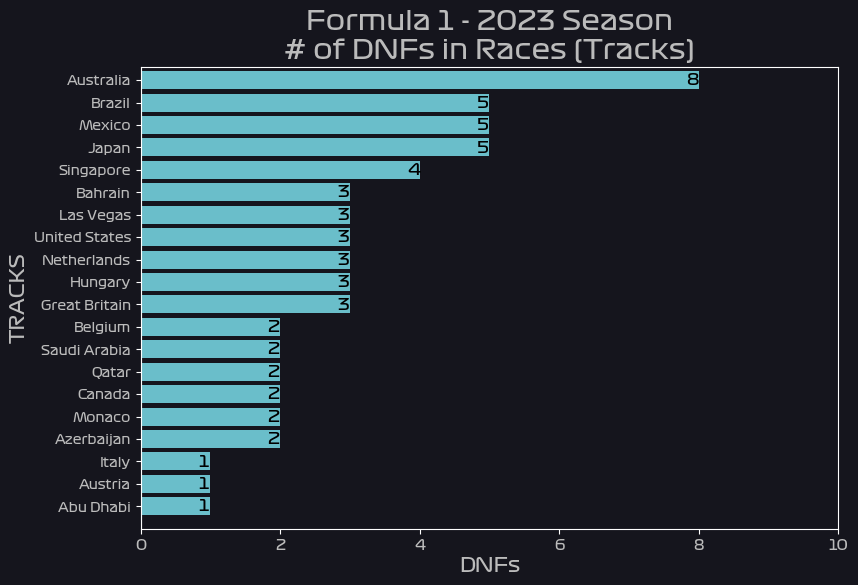

In [ ]:
DNFtrack = season2023RaceResults[season2023RaceResults['Time/Retired'] == 'DNF']['Track'].value_counts()
plt.figure(figsize=(9,6))
plt.axis([0,10,20,-0.6])
plt.barh(DNFtrack.index, DNFtrack, color='#6abeca')
plt.title('Formula 1 - 2023 Season\n# of DNFs in Races (Tracks)', fontsize=19, fontweight='bold', color='#bbbbbb')
for i in range(len(DNFtrack)):
    plt.text(DNFtrack[i]-0.18, i+0.22, DNFtrack[i], fontsize=12, fontweight='bold', color='k')
plt.xlabel('DNFs', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('TRACKS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

**Elaborated Insights from the Formula 1 2023 Season DNFs (Tracks) Chart**
=====================================================================

**Reliability Challenges**
-------------------------

Australia, Brazil, and Mexico: The chart highlights the reliability concerns at certain tracks, particularly Australia, Brazil, and Mexico, which experienced a higher number of DNFs. These circuits might have specific characteristics or conditions that contributed to mechanical failures or driver errors.

**Consistent Issues**
---------------------

Bahrain, Las Vegas, United States, Netherlands, Hungary, Great Britain: Several tracks, including Bahrain, Las Vegas, the United States, the Netherlands, Hungary, and Great Britain, consistently faced reliability challenges throughout the season. This suggests underlying issues with the track layout, conditions, or infrastructure that affected driver performance.

**Variability in Performance**
-----------------------------

Belgium, Saudi Arabia, Canada, Qatar, Monaco, Azerbaijan: Tracks like Belgium, Saudi Arabia, Canada, Qatar, Monaco, and Azerbaijan experienced a mix of reliability issues and relatively consistent performance. This indicates that factors like track layout, weather conditions, and driver skill played a significant role in determining the number of DNFs.

**Few Reliability Concerns**
---------------------------

Italy, Austria, Abu Dhabi: The tracks of Italy, Austria, and Abu Dhabi had the fewest DNFs, suggesting that their conditions and layouts were more conducive to consistent racing.

In [ ]:
season2023RaceResults[season2023RaceResults['Time/Retired'] == 'DNS'].set_index('Track')

,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,,
Italy,NC,22,Yuki Tsunoda,AlphaTauri Honda RBPT,11,0,DNS,0,No,NaN
Singapore,NC,18,Lance Stroll,Aston Martin Aramco Mercedes,20,0,DNS,0,No,NaN
Qatar,NC,55,Carlos Sainz,Ferrari,12,0,DNS,0,No,NaN
Brazil,NC,16,Charles Leclerc,Ferrari,2,0,DNS,0,No,NaN


In [ ]:
season2023RaceResults[(season2023RaceResults['Time/Retired'] == 'DNF') & (season2023RaceResults['Position'] != 'NC')] \
    .set_index('Track')

,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,,
Australia,13,10,Pierre Gasly,Alpine Renault,9,56,DNF,0,No,1:20.995
Australia,14,31,Esteban Ocon,Alpine Renault,11,56,DNF,0,No,1:21.203
Australia,15,21,Nyck De Vries,AlphaTauri Honda RBPT,15,56,DNF,0,No,1:21.183
Australia,16,2,Logan Sargeant,Williams Mercedes,18,56,DNF,0,No,1:21.456
Australia,17,20,Kevin Magnussen,Haas Ferrari,14,52,DNF,0,No,1:21.685
Monaco,19,20,Kevin Magnussen,Haas Ferrari,17,70,DNF,0,No,1:18.351
Great Britain,18,10,Pierre Gasly,Alpine Renault,10,46,DNF,0,No,1:31.539
Hungary,18,2,Logan Sargeant,Williams Mercedes,20,67,DNF,0,No,1:23.496
Singapore,16,63,George Russell,Mercedes,2,61,DNF,0,No,1:36.273


In [ ]:
season2023DotdVotes

,1st Place,1st Place(%),2nd Place,2nd Place(%),3rd Place,3rd Place(%),4th Place,4th Place(%),5th Place,5th Place(%)
Track,,,,,,,,,,
Bahrain,Fernando Alonso,53.3,Pierre Gasly,6.5,Max Verstappen,6.3,Lewis Hamilton,5.5,Charles Leclerc,4.4
Saudi Arabia,Max Verstappen,26.3,Sergio Perez,19.8,Fernando Alonso,14.6,Charles Leclerc,7.2,Lewis Hamilton,6.7
Australia,Sergio Perez,21.3,Lewis Hamilton,14.3,Pierre Gasly,10.3,Lando Norris,9.6,Carlos Sainz,9.0
Azerbaijan,Sergio Perez,29.1,Fernando Alonso,14.3,Charles Leclerc,11.4,Lewis Hamilton,9.1,Max Verstappen,6.6
Miami,Max Verstappen,27.1,Sergio Perez,12.5,Fernando Alonso,9.8,Lewis Hamilton,8.6,George Russell,7.9
Monaco,Esteban Ocon,23.5,Fernando Alonso,22.6,Max Verstappen,16.5,Lewis Hamilton,7.5,Charles Leclerc,6.2
Spain,Lewis Hamilton,24.7,Sergio Perez,19.2,George Russell,11.3,Max Verstappen,10.6,Fernando Alonso,5.4
Canada,Alex Albon,28.7,Lewis Hamilton,16.4,Fernando Alonso,16.3,Max Verstappen,7.4,Charles Leclerc,7.3
Austria,Lando Norris,26.1,Carlos Sainz,22.4,Sergio Perez,21.8,Charles Leclerc,7.6,Max Verstappen,6.5


<ipython-input-66-78e81f15ad11>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(DotdAwards[i]-0.18, i+0.2, DotdAwards[i], fontsize=16, fontweight='bold', color='k')


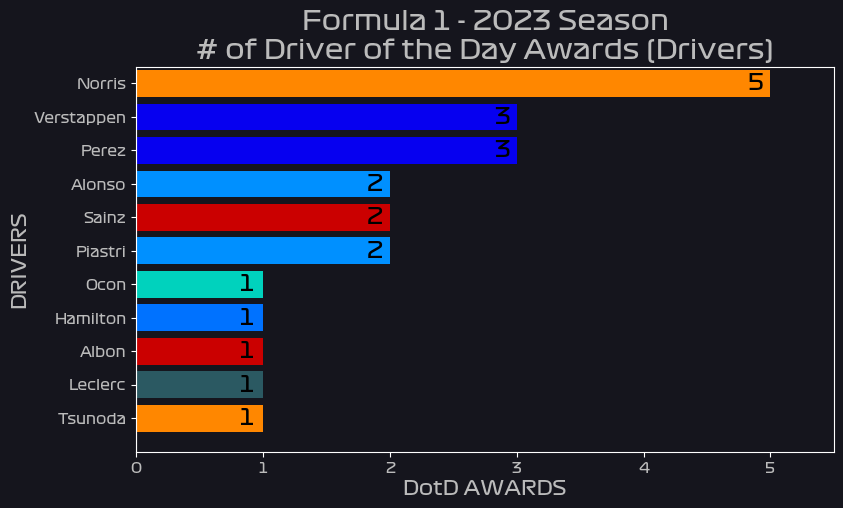

In [ ]:
DotdAwards = season2023DotdVotes['1st Place'].value_counts()
c = assign_color('drivers', DotdAwards.index)
plt.figure(figsize=(9,5))
plt.axis([0,5.5,11,-0.5])
plt.barh([" ".join(driver.split()[1:]) for driver in DotdAwards.index], DotdAwards, color=c)
for i in range(len(DotdAwards)):
    plt.text(DotdAwards[i]-0.18, i+0.2, DotdAwards[i], fontsize=16, fontweight='bold', color='k')
plt.title('Formula 1 - 2023 Season\n# of Driver of the Day Awards (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('DotD AWARDS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

**Elaborated Insights from the Formula 1 2023 Season Driver of the Day Awards Chart**
=====================================================================

**Dominance**
-------------

Norris: Lando Norris emerged as a clear leader in terms of Driver of the Day awards, securing five such accolades throughout the season. This highlights his impressive performances and ability to consistently impress fans and experts.

**Close Competition**
---------------------

Verstappen and Perez: Max Verstappen and Sergio Perez, both from Red Bull Racing, finished in second place with three awards each. This close competition among the top drivers demonstrates the high level of racing and the difficulty of securing Driver of the Day honors.

**Consistent Performance**
-------------------------

Alonso, Sainz, and Piastri: Fernando Alonso, Carlos Sainz, and Oscar Piastri each received two Driver of the Day awards, showcasing their consistent performances and ability to deliver standout drives throughout the season.

**Variability in Performance**
-----------------------------

Ocon, Hamilton, Albon, Leclerc, and Tsunoda: A group of drivers, including Esteban Ocon, Lewis Hamilton, Alex Albon, Charles Leclerc, and Yuki Tsunoda, received one Driver of the Day award each. This indicates that while they had some standout performances, their overall consistency might have been less compared to the top contenders.

<ipython-input-67-142dab76331a>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(DotdAppearanceDf[i]-0.9, i+0.25, "{:>3}".format(DotdAppearanceDf[i]), fontsize=12, fontweight='bold', color='k')


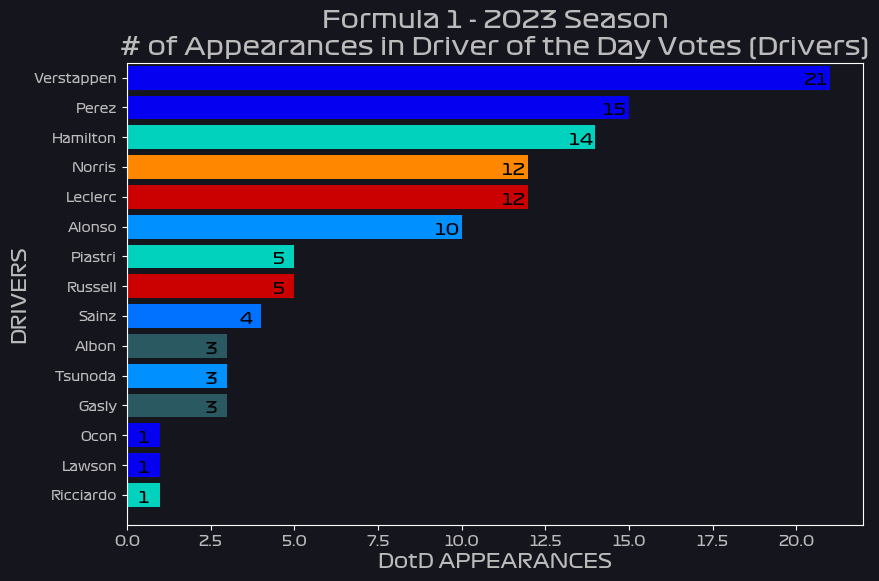

In [ ]:
DotdAppearance = {}
for place in range(5):
    for driver in range(len(season2023DotdVotes)):
        d = season2023DotdVotes.iloc[driver,place*2]
        if d not in DotdAppearance.keys():   DotdAppearance[d] = 1
        else:   DotdAppearance[d] += 1
DotdAppearanceDf = pd.Series(DotdAppearance).sort_values(ascending=False)
c = assign_color('drivers', DotdAppearanceDf.index)
plt.figure(figsize=(9.5,6))
plt.axis([0,22,15,-0.5])
plt.barh([" ".join(driver.split()[1:]) for driver in DotdAppearanceDf.index], DotdAppearanceDf, color=c)
for i in range(len(DotdAppearanceDf)):
    plt.text(DotdAppearanceDf[i]-0.9, i+0.25, "{:>3}".format(DotdAppearanceDf[i]), fontsize=12, fontweight='bold', color='k')
plt.title('Formula 1 - 2023 Season\n# of Appearances in Driver of the Day Votes (Drivers)', fontsize=18,
          fontweight='bold', color='#bbbbbb')
plt.xlabel('DotD APPEARANCES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

**Elaborated Insights from the Formula 1 2023 Season Driver of the Day Votes (Drivers) Chart**
=====================================================================

**Dominance**
-------------

Verstappen: Max Verstappen's 21 appearances in Driver of the Day votes clearly demonstrate his dominance throughout the season. His consistent strong performances and ability to impress fans and experts earned him a significant number of nominations.

**Close Competition**
---------------------

Perez and Hamilton: Following closely behind Verstappen are Sergio Perez and Lewis Hamilton, both with 15 and 14 appearances, respectively. This indicates a competitive battle for the top spot, with Perez and Hamilton consistently delivering impressive drives.

**Consistent Performance**
-------------------------

Norris and Leclerc: Lando Norris and Charles Leclerc both secured 12 appearances in Driver of the Day votes, showcasing their consistent ability to deliver standout performances and earn recognition from fans and experts.

**Midfield Contenders**
-----------------------

Alonso, Piastri, Russell, and Sainz: Fernando Alonso, Oscar Piastri, George Russell, and Carlos Sainz demonstrated solid performances in the midfield, with appearances in Driver of the Day votes ranging from 4 to 10. This highlights the competitive nature of the midfield battle.

**Variability in Performance**
-----------------------------

Albon, Tsunoda, Gasly, Ocon, Lawson, and Ricciardo: Drivers like Alex Albon, Yuki Tsunoda, Pierre Gasly, Esteban Ocon, Nyck de Vries, and Daniel Ricciardo experienced some fluctuations in their performances, as evidenced by their lower number of appearances in Driver of the Day votes.

<ipython-input-68-4fa7f222c76b>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(driversTotalLaps[i]-100, i+0.25, driversTotalLaps[i], fontsize=12, fontweight='bold', color='k')


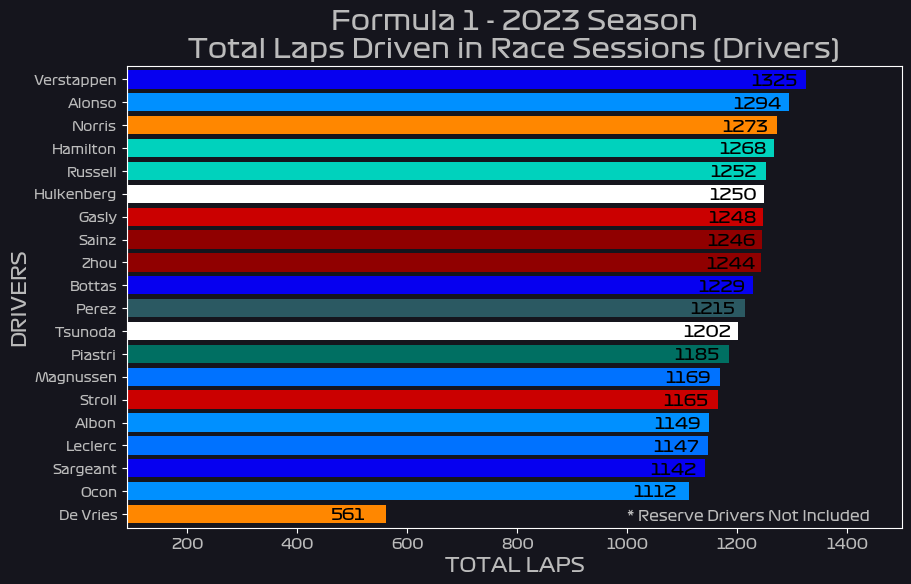

In [ ]:
driversTotalLaps = season2023RaceResults.groupby('Driver')['Laps'].sum().sort_values(ascending=False)[:20]
c = assign_color('drivers', driversTotalLaps.index)
plt.figure(figsize=(10,6))
plt.axis([90,1500,19.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in driversTotalLaps.index], driversTotalLaps, color=c)
for i in range(len(driversTotalLaps)):
    plt.text(driversTotalLaps[i]-100, i+0.25, driversTotalLaps[i], fontsize=12, fontweight='bold', color='k')
plt.text(999, 19.3, "* Reserve Drivers Not Included", fontweight='bold', color='#bbbbbb')
plt.title('Formula 1 - 2023 Season\nTotal Laps Driven in Race Sessions (Drivers)', fontsize=19, fontweight='bold',
          color='#bbbbbb')
plt.xlabel('TOTAL LAPS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(90, color='#bbbbbb')
plt.show()

**Elaborated Insights from the Formula 1 2023 Season Total Laps Driven Chart**
=====================================================================

**Verstappen's Dominance**
-------------------------

Max Verstappen's impressive total of 1325 laps driven underscores his dominance throughout the 2023 season. His consistent participation in races and ability to complete a high number of laps highlight his reliability and performance.

**Close Competition at the Top**
-------------------------------

A competitive battle emerged among the top drivers, with Fernando Alonso, Lando Norris, Lewis Hamilton, and George Russell all driving over 1200 laps. This demonstrates the high level of competition and consistency required to maintain a top position.

**Midfield Contenders**
-----------------------

The midfield drivers, including Nico Hulkenberg, Pierre Gasly, Carlos Sainz, Zhou Guanyu, and Valtteri Bottas, also displayed consistent participation and competitiveness, driving a significant number of laps.

**Variability in Performance**
-----------------------------

Several drivers, including Sergio Perez, Yuki Tsunoda, Oscar Piastri, Kevin Magnussen, Lance Stroll, Alex Albon, Charles Leclerc, Logan Sargeant, Esteban Ocon, and Nyck de Vries, faced challenges throughout the season, resulting in fewer laps driven due to missed races or retirements.

<ipython-input-46-953a76f9132b>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(teamsTotalLaps[i]-45, i+0.2, teamsTotalLaps[i], fontsize=14, fontweight='bold', color='k')


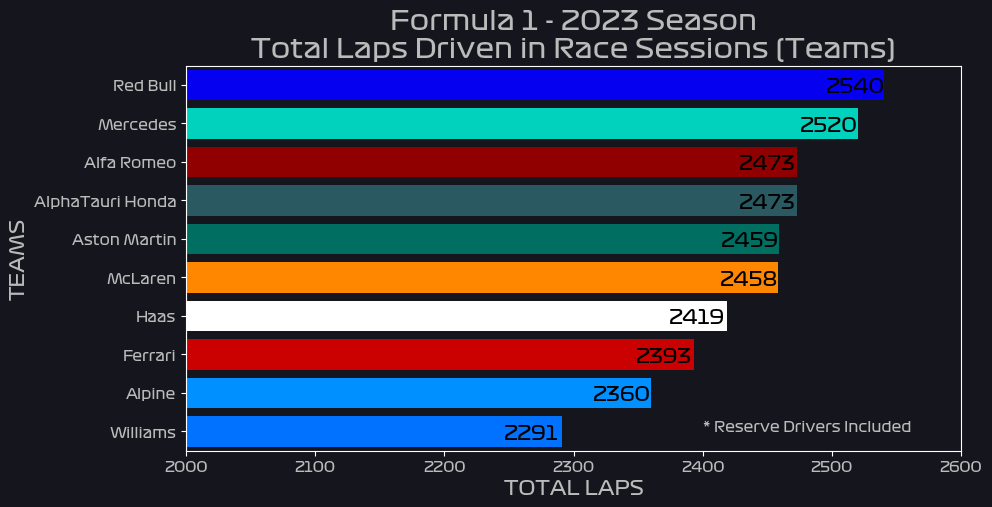

In [ ]:
teamsTotalLaps = season2023RaceResults.groupby('Team')['Laps'].sum().sort_values(ascending=False)
c = assign_color('teams', teamsTotalLaps.index)
plt.figure(figsize=(10,5))
plt.axis([2000,2600,9.5,-0.5])
teamLabel = [" ".join(team.split()[:2]) if len(team.split()) > 2 else team.split()[0] for team in teamsTotalLaps.index]
plt.barh(teamLabel, teamsTotalLaps, color=c)
for i in range(len(teamsTotalLaps)):
    plt.text(teamsTotalLaps[i]-45, i+0.2, teamsTotalLaps[i], fontsize=14, fontweight='bold', color='k')
plt.text(2400, 9.0, "* Reserve Drivers Included", fontweight='bold', color='#bbbbbb')
plt.title('Formula 1 - 2023 Season\nTotal Laps Driven in Race Sessions (Teams)', fontsize=19, fontweight='bold',
           color='#bbbbbb')
plt.xlabel('TOTAL LAPS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('TEAMS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(2000, color='#bbbbbb')
plt.show()

# **Red Bull's Dominance**
-------------------------

Red Bull Racing once again showcased their supremacy in the 2023 season, leading all teams in total laps driven. This dominance reflects their consistent performance, reliability, and ability to keep their cars on the track.

**Close Competition from Mercedes**
---------------------------------

Mercedes-Benz closely followed Red Bull, highlighting a competitive battle between the two top teams. Their high total laps driven demonstrate their strong performance and reliability.

**Midfield Competition**
-----------------------

The midfield teams engaged in a fiercely competitive battle, with Alfa Romeo, AlphaTauri, Aston Martin, McLaren, Haas, Ferrari, and Alpine all vying for positions. The close proximity of their total laps driven underscores the tight competition for points and positions throughout the season.

**Williams' Challenges**
----------------------

Williams Racing faced challenges during the season, as indicated by their lower total laps driven. However, it's important to note that this ranking includes reserve drivers, which may impact the overall comparison.

In [ ]:
trackDistance = season2023RaceCalendar['Circuit Length(km)'].values
num_races = len(trackDistance)
drivers = season2023RaceResults['Driver'].unique()

# 3. Initialize a dictionary to store laps per driver
driversLaps = {}

# 4. Fill in the laps for each driver (ensure all lap counts are equal to the number of races)
for driver in drivers:
    laps_completed = season2023RaceResults[season2023RaceResults['Driver'] == driver]['Laps'].values
    # If the driver has fewer lap records than the number of races, append zeros to match
    if len(laps_completed) < num_races:
        laps_completed = np.append(laps_completed, [0] * (num_races - len(laps_completed)))
    driversLaps[driver] = laps_completed

# Initialize a dictionary to store the total distance covered by each driver
driversDist = {}

# Calculate total distance covered for each driver
for driver in driversLaps.keys():
    laps_completed = driversLaps[driver]

    # Ensure lap count matches track distance count
    if len(laps_completed) != num_races:
        laps_completed = np.resize(laps_completed, num_races)  # Adjust the length to match trackDistance

    # Calculate total distance for the driver
    total_distance = (laps_completed * trackDistance).sum()
    driversDist[driver] = round(total_distance, 2)

# Sort and display top 20 drivers by total distance covered
driversTotalDist = pd.Series(driversDist).sort_values(ascending=False)[:20]

<ipython-input-71-c4aabb34cdac>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(driversTotalDist[i]-600, i+0.22, "{:4.2f}".format(driversTotalDist[i]), fontsize=12, fontweight='bold', color='k')


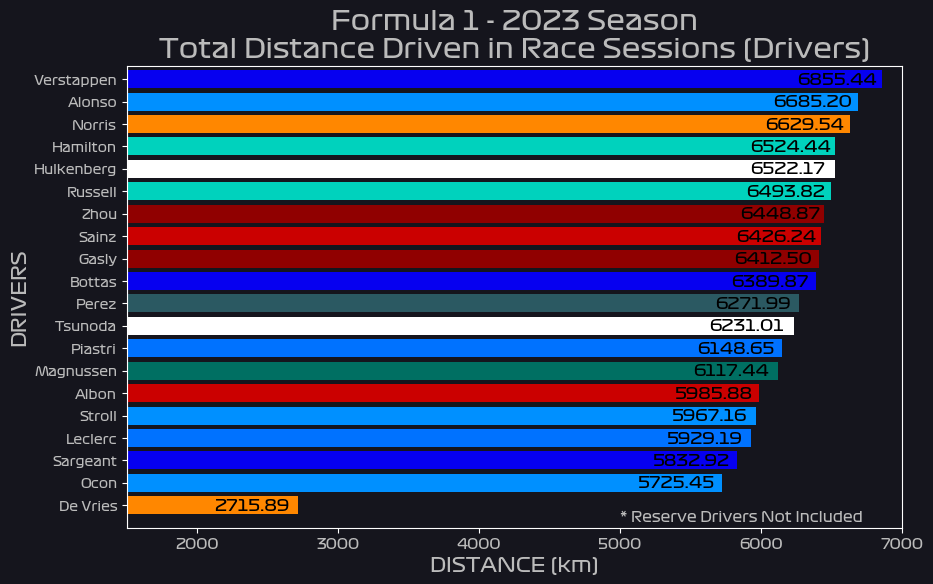

In [ ]:
c = assign_color('drivers', driversTotalDist.index)
plt.figure(figsize=(10,6))
plt.axis([1500,7000,20,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in driversTotalDist.index], driversTotalDist, color=c)
for i in range(len(driversTotalDist)):
    plt.text(driversTotalDist[i]-600, i+0.22, "{:4.2f}".format(driversTotalDist[i]), fontsize=12, fontweight='bold', color='k')
plt.text(5000, 19.7, '* Reserve Drivers Not Included', fontweight='bold', color='#bbbbbb')
plt.title('Formula 1 - 2023 Season\nTotal Distance Driven in Race Sessions (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('DISTANCE (km)', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(1500, color='#bbbbbb')
plt.show()

**Elaborated Insights from the Formula 1 2023 Season Total Distance Driven (Drivers) Chart**
=====================================================================

**Dominance**
-------------

Verstappen: Max Verstappen's impressive total of 6855.44 kilometers driven clearly demonstrates his dominance throughout the season. His consistent participation in races and his ability to complete a high number of laps highlight his reliability and performance.

**Close Competition**
---------------------

Alonso, Norris, Hamilton, and Hulkenberg: Following closely behind Verstappen are Fernando Alonso, Lando Norris, Lewis Hamilton, and Nico Hulkenberg, all of whom have driven over 6500 kilometers. This indicates a competitive battle among the top drivers, with consistent participation and strong performance.

**Midfield Battle**
-------------------

Russell, Zhou, Sainz, Gasly, Bottas, Perez, Tsunoda, and Piastri: The midfield drivers, including George Russell, Zhou Guanyu, Carlos Sainz, Pierre Gasly, Valtteri Bottas, Sergio Perez, Yuki Tsunoda, and Oscar Piastri, have also driven a significant number of kilometers, showcasing their consistent participation and competitive nature.

**Variability in Performance**
-----------------------------

Magnussen, Albon, Stroll, Leclerc, Sargeant, Ocon, and de Vries: Drivers like Kevin Magnussen, Alex Albon, Lance Stroll, Charles Leclerc, Logan Sargeant, Esteban Ocon, and Nyck de Vries have driven fewer kilometers, indicating some missed races or retirements during the season.

<ipython-input-72-2bd2e13915b5>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(driversTotalLaps[i]-66, i+0.25, driversTotalLaps[i], fontsize=12, fontweight='bold', color='k')


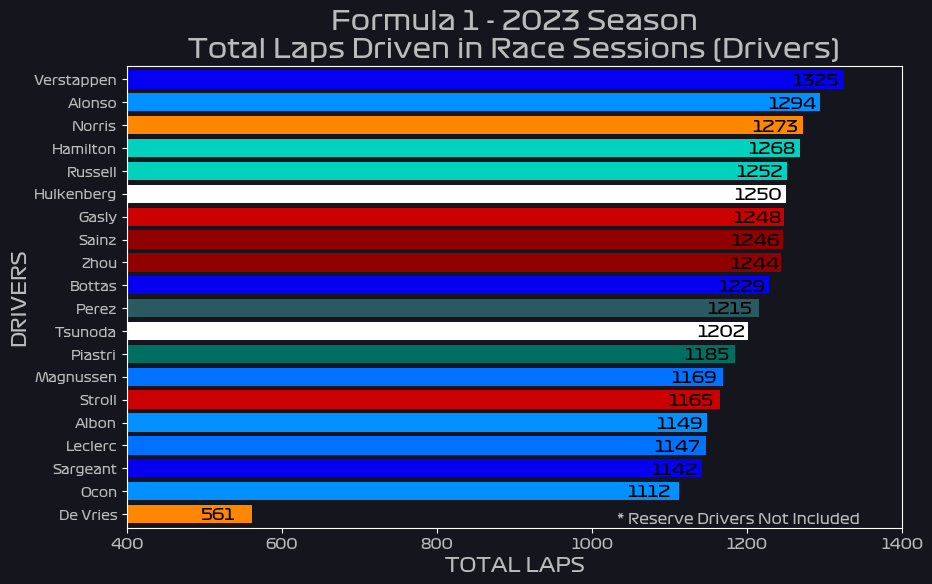

In [ ]:
driversTotalLaps = season2023RaceResults.groupby('Driver')['Laps'].sum().sort_values(ascending=False)[:20]
c = assign_color('drivers', driversTotalLaps.index)
plt.figure(figsize=(10,6))
plt.axis([400,1400,19.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in driversTotalLaps.index], driversTotalLaps, color=c)
for i in range(len(driversTotalLaps)):
    plt.text(driversTotalLaps[i]-66, i+0.25, driversTotalLaps[i], fontsize=12, fontweight='bold', color='k')
plt.text(1033, 19.4, "* Reserve Drivers Not Included", fontweight='bold', color='#bbbbbb')
plt.title('Formula 1 - 2023 Season\nTotal Laps Driven in Race Sessions (Drivers)', fontsize=19, fontweight='bold',
          color='#bbbbbb')
plt.xlabel('TOTAL LAPS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(400, color='#bbbbbb')
plt.show()

**Elaborated Insights from the Formula 1 2023 Season Total Laps Driven (Drivers) Chart**
=====================================================================

**Verstappen's Dominance**
-------------------------

Max Verstappen's impressive total of 1325 laps driven clearly demonstrates his dominance throughout the 2023 season. His consistent participation in races and his ability to complete a high number of laps highlight his reliability and performance.

**Close Competition**
---------------------

Alonso, Norris, Hamilton, and Russell: Following closely behind Verstappen are Fernando Alonso, Lando Norris, Lewis Hamilton, and George Russell, all of whom have driven over 1200 laps. This indicates a competitive battle among the top drivers, with consistent participation and strong performance.

**Midfield Battle**
-------------------

Hulkenberg, Gasly, Sainz, Zhou, Bottas, Perez, Tsunoda, and Piastri: The midfield drivers, including Nico Hulkenberg, Pierre Gasly, Carlos Sainz, Zhou Guanyu, Valtteri Bottas, Sergio Perez, Yuki Tsunoda, and Oscar Piastri, have also driven a significant number of laps, showcasing their consistent participation and competitive nature.

**Variability in Performance**
-----------------------------

Magnussen, Albon, Stroll, Leclerc, Sargeant, Ocon, and de Vries: Drivers like Kevin Magnussen, Alex Albon, Lance Stroll, Charles Leclerc, Logan Sargeant, Esteban Ocon, and Nyck de Vries have driven fewer laps, indicating some missed races or retirements during the season.

<ipython-input-73-8d128948310a>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(teamsTotalLaps[i]-45, i+0.2, teamsTotalLaps[i], fontsize=14, fontweight='bold', color='k')


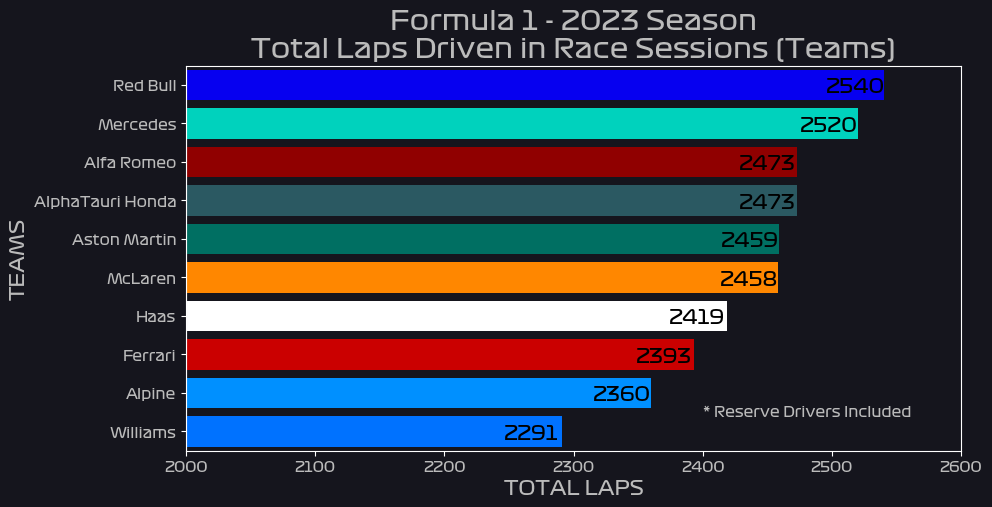

In [ ]:
teamsTotalLaps = season2023RaceResults.groupby('Team')['Laps'].sum().sort_values(ascending=False)
c = assign_color('teams', teamsTotalLaps.index)
plt.figure(figsize=(10,5))
plt.axis([2000,2600,9.5,-0.5])
teamLabel = [" ".join(team.split()[:2]) if len(team.split()) > 2 else team.split()[0] for team in teamsTotalLaps.index]
plt.barh(teamLabel, teamsTotalLaps, color=c)
for i in range(len(teamsTotalLaps)):
    plt.text(teamsTotalLaps[i]-45, i+0.2, teamsTotalLaps[i], fontsize=14, fontweight='bold', color='k')
plt.text(2400, 8.6, "* Reserve Drivers Included", fontweight='bold', color='#bbbbbb')
plt.title('Formula 1 - 2023 Season\nTotal Laps Driven in Race Sessions (Teams)', fontsize=19, fontweight='bold',
           color='#bbbbbb')
plt.xlabel('TOTAL LAPS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('TEAMS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(2000, color='#bbbbbb')
plt.show()

**Elaborated Insights from the Formula 1 2023 Season Total Laps Driven (Teams) Chart**
=====================================================================

**Red Bull's Dominance**
-------------------------

Red Bull Racing once again showcased their supremacy in the 2023 season, leading all teams in total laps driven. This dominance reflects their consistent performance, reliability, and ability to keep their cars on the track.

**Mercedes' Close Challenge**
-----------------------------

Mercedes-Benz closely followed Red Bull, indicating a competitive battle between the two top teams. Their high total laps driven demonstrate their strong performance and reliability, making them a formidable opponent throughout the season.

**Midfield Competition**
-----------------------

The midfield teams engaged in a fiercely competitive battle, with Alfa Romeo, AlphaTauri, Aston Martin, McLaren, Haas, Ferrari, and Alpine all vying for positions. The close proximity of their total laps driven underscores the tight competition for points and positions throughout the season.

**Williams' Challenges**
----------------------

Williams Racing faced challenges during the season, as indicated by their lower total laps driven. This suggests potential issues with reliability or performance, which hindered their ability to consistently compete at the same level as the other teams. However, it's important to note that this ranking includes reserve drivers, which may impact the overall comparison.

**Overall Insights**
-------------------

Overall, the chart highlights Red Bull's dominance, the competitive nature of the midfield battle, and the challenges faced by Williams Racing during the 2023 season.

In [ ]:
trackDistance = season2023RaceCalendar['Circuit Length(km)'].values
drivers = season2023RaceResults['Driver'].unique()
driversLaps = {}
for driver in drivers:
    driversLaps[driver] = season2023RaceResults[season2023RaceResults['Driver'] == driver]['Laps'].values
driversDist = {}
for driver in driversLaps.keys():
    if len(driversLaps[driver]) != len(trackDistance):
        driversLaps[driver] = np.resize(driversLaps[driver], len(trackDistance))
    driversDist[driver] = round((driversLaps[driver] * trackDistance).sum(), 2)
driversTotalDist = pd.Series(driversDist).sort_values(ascending=False)[:20]

<ipython-input-65-3b0da321bb6d>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(driversTotalDist[i]-666, i+0.22, "{:4.2f}".format(driversTotalDist[i]), fontsize=12, fontweight='bold', color='k')


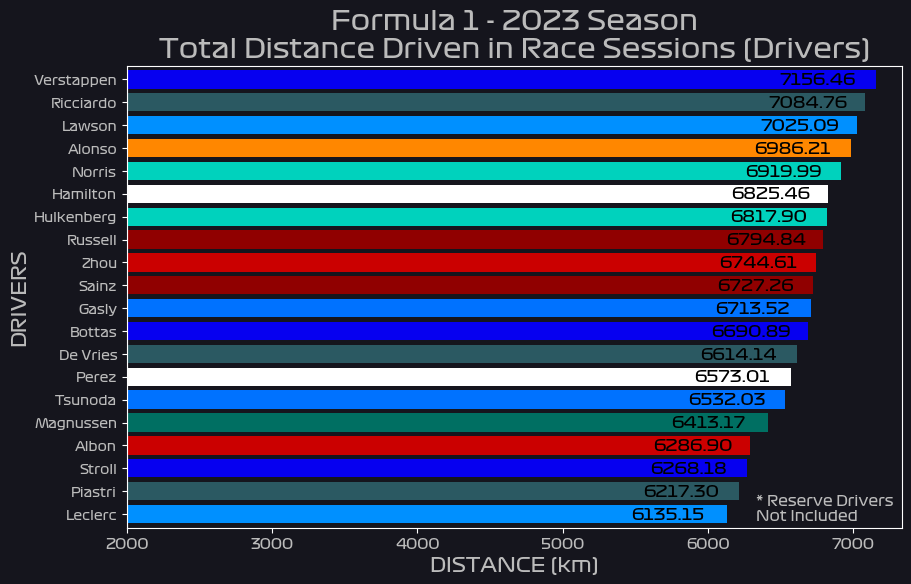

In [ ]:
c = assign_color('drivers', driversTotalDist.index)
plt.figure(figsize=(10,6))
plt.axis([2000,7336,19.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in driversTotalDist.index], driversTotalDist, color=c)
for i in range(len(driversTotalDist)):
    plt.text(driversTotalDist[i]-666, i+0.22, "{:4.2f}".format(driversTotalDist[i]), fontsize=12, fontweight='bold', color='k')
plt.text(6333, 19.3, '* Reserve Drivers \nNot Included', fontweight='bold', color='#bbbbbb')
plt.title('Formula 1 - 2023 Season\nTotal Distance Driven in Race Sessions (Drivers)', fontsize=19, fontweight='bold',
          color='#bbbbbb')
plt.xlabel('DISTANCE (km)', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(2000, color='#bbbbbb')
plt.show()

**Elaborated Insights from the Formula 1 2023 Season Total Distance Driven (Drivers) Chart**
=====================================================================

**Verstappen's Dominance**
-------------------------

Max Verstappen's impressive total of 7156.46 kilometers driven clearly demonstrates his dominance throughout the 2023 season. His consistent participation in races and his ability to complete a high number of laps highlight his reliability and performance.

**Close Competition**
---------------------

Ricciardo and Lawson: Following closely behind Verstappen are Daniel Ricciardo and Liam Lawson, both of whom have driven over 7000 kilometers. This indicates a competitive battle among the top drivers, with consistent participation and strong performance.

**Experienced Drivers**
-----------------------

Alonso, Norris, Hamilton, and Hulkenberg: A group of experienced drivers, including Fernando Alonso, Lando Norris, Lewis Hamilton, and Nico Hulkenberg, have also driven a significant number of kilometers, showcasing their consistent performance and reliability.

**Midfield Battle**
-------------------

Russell, Zhou, Sainz, Gasly, Bottas, Perez, Tsunoda, and Piastri: The midfield drivers, including George Russell, Zhou Guanyu, Carlos Sainz, Pierre Gasly, Valtteri Bottas, Sergio Perez, Yuki Tsunoda, and Oscar Piastri, have demonstrated consistent participation and competitive nature, driving between 6217.30 and 6744.61 kilometers.

**Variability in Performance**
-----------------------------

Magnussen, Albon, Stroll, Leclerc: Drivers like Kevin Magnussen, Alex Albon, Lance Stroll, and Charles Leclerc have driven fewer kilometers, indicating some missed races or retirements during the season.

**Overall Insights**
-------------------

Overall, the chart highlights Verstappen's dominance and the competitive nature of the midfield battle. While Ricciardo and Lawson have shown strong performances, the experienced drivers in the middle of the pack have also demonstrated consistent participation and competitiveness.

# Formula 1 2023 Season Review
The 2023 Formula 1 season was an exciting year, filled with dominant performances, intense rivalries, and significant milestones. Here's a comprehensive review of how the season unfolded across key areas:

---

## 1. **Max Verstappen and Red Bull's Dominance**
The 2023 season saw Max Verstappen secure his third consecutive World Drivers' Championship, solidifying his legacy as one of the greats of the sport. He dominated the season with **19 race wins** out of 22, a record-breaking performance.

- **Key Stats**:
  - **Total Wins**: 19 out of 22 races
  - **Podiums**: 21 podium finishes
  - **Championship Secured**: Verstappen won the title with several races remaining, underlining Red Bull’s dominance.
  - **Sprint Race Points**: Verstappen also topped the sprint race points tally, emphasizing his consistent performance in both traditional races and sprint formats.

Verstappen’s Red Bull teammate, **Sergio Pérez**, also contributed to the team's Constructors' Championship win, although he only managed **2 race wins** in contrast to Verstappen's massive haul. Pérez remained crucial in helping Red Bull seal the Constructors' Championship early.

---

## 2. **Red Bull’s Constructors' Championship Victory**
Red Bull Racing dominated the Constructors' Championship, winning it with a wide margin. Their car, the **RB19**, proved to be the best on the grid, with top-tier aerodynamic efficiency, speed, and reliability. The team won **21 of the 22 races** held in the season, further underlining their superiority.

- **Key Figures**:
  - **Constructors’ Championship Secured**: Dominated with Red Bull winning the title well before the final races.
  - **Team Dynamic**: Despite the dominance, tension between Verstappen and Pérez occasionally surfaced, especially in qualifying battles, though the team managed to remain cohesive.

---

## 3. **Ferrari’s Inconsistency**
Ferrari had a mixed season, with **Charles Leclerc** and **Carlos Sainz** unable to consistently challenge Red Bull. However, Ferrari remained competitive, with Leclerc securing **multiple podium finishes**. Sainz had a breakthrough moment by clinching **1 race win**, proving Ferrari could still deliver under the right conditions.

- **Key Insights**:
  - **Leclerc**: Continued to show excellent qualifying pace but suffered from race-day inconsistencies.
  - **Sainz**: Managed one of the few non-Red Bull victories, which was seen as a major highlight of the season for Ferrari.

---

## 4. **Mercedes’ Struggles and Developments**
Mercedes showed signs of recovery after a challenging 2022 season. **Lewis Hamilton** and **George Russell** both achieved several podium finishes, though the team struggled to consistently compete with Red Bull. Mercedes introduced mid-season upgrades that helped improve their performance, but they were still far from challenging for race wins regularly.

- **Highlights**:
  - **Hamilton**: Though unable to secure a race win, Hamilton showed competitive form, regularly finishing in the top 3.
  - **Russell**: Delivered consistent performances, but without any race victories.

---

## 5. **Fernando Alonso’s Aston Martin Revival**
**Fernando Alonso** had a resurgence in the 2023 season, securing **8 podium finishes** and putting Aston Martin on the map as a team to watch. His veteran experience allowed Aston Martin to challenge more established teams like Ferrari and Mercedes in the fight for podiums.

- **Alonso’s Performance**: A standout, consistently outperforming teammate Lance Stroll, Alonso brought Aston Martin back into the upper midfield battle.

---

## 6. **Midfield Battle**
The midfield in 2023 was highly competitive, with teams like **McLaren**, **Alpine**, and **Aston Martin** exchanging blows throughout the season.

- **McLaren’s Progress**: McLaren had a notable improvement, especially in the second half of the season. **Lando Norris** and **Oscar Piastri** delivered solid performances, with Norris even securing a few podiums.
- **Alpine’s Disappointment**: Alpine had a mixed season, often competing for top 10 finishes but failing to make a major impact. Internal team issues and a lack of consistent upgrades hampered their progress.

---

## 7. **Introduction of New Tech and Sprint Races**
The 2023 season saw an expansion of sprint races, with several rounds featuring the shorter race format. These races added an extra layer of excitement, with drivers and teams needing to adapt their strategies for both qualifying and race days.

- **Tech Focus**: Several teams, particularly McLaren and Mercedes, introduced new aerodynamic packages that helped them improve throughout the season, especially in high-downforce circuits.

---

## 8. **Daniel Ricciardo’s Return and Retirement Rumors**
**Daniel Ricciardo** returned to Formula 1 mid-season, joining **AlphaTauri** after leaving McLaren in 2022. While he showed flashes of his old brilliance, Ricciardo struggled to make a significant impact with AlphaTauri, who were competing at the back of the grid. By the end of the season, rumors of his impending retirement began to surface, although Ricciardo has not yet made a final decision.

---

## Conclusion
The 2023 Formula 1 season was marked by **Max Verstappen’s overwhelming dominance** and **Red Bull’s technical superiority**. Ferrari, Mercedes, and Aston Martin fought valiantly, but none could consistently challenge Red Bull. The resurgence of Fernando Alonso and Aston Martin, the ongoing struggles of Mercedes, and the competitiveness of the midfield teams like McLaren added excitement to a season otherwise dominated by one driver and one team. As the sport continues to evolve, the 2023 season will be remembered for Verstappen’s historic achievements and Red Bull’s near-perfect season.



# **How's 2024 Season Progressing?**
# Formula 1 2024 Season - Detailed Analysis (as of September)

## 1. **Max Verstappen’s Continued Dominance**
Max Verstappen, driving for Red Bull Racing, has solidified his place as the top driver of the 2024 season, continuing from his dominant form in previous years. With numerous race wins already in the first half of the season, Verstappen is poised for another championship. His consistency and strategic brilliance, coupled with Red Bull's superior car performance, give him a significant advantage over his competitors. Verstappen’s ability to secure both pole positions and race victories has made him the driver to beat.

- **Race Wins**: As of mid-September, Verstappen has won the majority of the races in the season.
- **Qualifying Prowess**: His exceptional one-lap pace has translated into multiple pole positions, giving him the perfect launchpad for race success.

## 2. **Red Bull Racing’s Strength**
Red Bull Racing remains the dominant force in the 2024 season, largely thanks to their technical superiority and driver lineup. Sergio Perez has delivered solid performances, contributing crucial points, though Verstappen remains the standout driver. Red Bull’s strategic excellence and reliability have helped them secure victories even in races where their rivals seemed stronger.

- **Perez’s Contribution**: While Verstappen leads the team, Perez has been key in maintaining Red Bull's dominance in the Constructors’ Championship. His podium finishes, though fewer than Verstappen’s, are vital for the team standings.

## 3. **Competitive Midfield Battle**
The midfield battle has been highly competitive, with teams like Ferrari, Mercedes, and Aston Martin frequently challenging for podium finishes. However, these teams have struggled to match Red Bull’s dominance, showing occasional flashes of brilliance but lacking the consistency to pose a sustained challenge for the championship.

- **Ferrari**: Ferrari drivers Charles Leclerc and Carlos Sainz have managed to secure some podium finishes, although their performance has not been as competitive as hoped. While Leclerc has shown strong pace in qualifying, the race results have been less consistent.
- **Mercedes**: Lewis Hamilton and George Russell have shown resilience, with the team making progress throughout the season. However, they remain just short of consistently challenging Red Bull&#8203;:contentReference.
- **Aston Martin**: Fernando Alonso, in particular, has had a standout season for Aston Martin, securing podiums and keeping the team in the midfield battle.

## 4. **Sustainability and Logistical Adjustments**
A key highlight of the 2024 season is Formula 1's increased focus on sustainability. The calendar has been regionally adjusted to reduce the carbon footprint associated with global travel. This initiative is part of F1’s broader commitment to achieve net-zero carbon emissions by 2030.

- **Regionalized Calendar**: The scheduling changes aim to minimize travel distances between races. For example, the European races are clustered together, followed by the Americas’ rounds and the Middle Eastern finale.
- **Calendar Highlights**: Key races like the Belgian Grand Prix mark the halfway point of the season, while the final races will occur in Austin, Mexico City, and Las Vegas, culminating in the Abu Dhabi Grand Prix.

## 5. **Daniel Ricciardo’s Retirement**
One of the biggest shocks of the 2024 season is Daniel Ricciardo's retirement from Formula 1 After The Singapore Grand Prix 2024. After struggling for form in recent years and a brief comeback with AlphaTauri, Ricciardo decided to step away from the sport at the conclusion of the 2024 season. Known for his bold overtakes, infectious personality, and race-winning capabilities, Ricciardo's exit leaves a big gap in the F1 paddock.

- **Legacy**: Ricciardo retires with 8 Grand Prix wins to his name, and his time in Formula 1 will be remembered for some of the most iconic moments, such as his victories with Red Bull, McLaren and Renault.

## 6. **McLaren’s New Tech Upgrades**
McLaren has undergone a significant technological overhaul in the 2024 season. Following the struggles of previous years, McLaren introduced new aerodynamic upgrades and enhanced their power unit development. The improvements have led to a resurgence in performance, with the team showing strong midfield competitiveness and even challenging for podiums on occasion.

- **Aerodynamic Package**: The key to McLaren's revival has been their revised aero package, focusing on improved downforce and reducing drag, which has particularly benefitted them on high-speed circuits.
- **Driver Performances**: Lando Norris and Oscar Piastri have both capitalized on these upgrades, with Norris especially showing renewed form. This technological advancement may position McLaren as a serious podium contender in the second half of the season.

## 7. **Upcoming Challenges**
As the season moves into the final third, several crucial races will determine the outcome of both the Drivers’ and Constructors’ Championships. The triple-header in the Americas (Austin, Mexico City, and Brazil) will be pivotal

- **Potential Upsets**: Though Red Bull leads, Ferrari and Mercedes will be looking to disrupt Verstappen’s run, especially in the high-downforce circuits like Singapore.
- **Final Races**: After the triple-header in the Americas, the Las Vegas and Abu Dhabi races will be crucial for teams trying to consolidate their positions in both championships.

## Conclusion
The 2024 F1 season is shaping up to be another dominant year for Max Verstappen and Red Bull Racing. However, the competition among Ferrari, Mercedes, and Aston Martin in the midfield provides an exciting dynamic for fans, with each team vying for the remaining podium spots. McLaren's technological upgrades and Daniel Ricciardo's retirement add further intrigue to a season full of both expected outcomes and surprises. Additionally, F1’s increasing focus on sustainability is driving changes in how the sport operates, signaling a broader transformation for the future of motorsport.




# **All right ,that's all everyone! Thank you very much for reading the analyses, and please provide your feedback too See you with the analysis of 2024 Season**